The goal of this project is to predict whether an individual's annual income is more or less than 50k

In [87]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, ParameterSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv("adult income1.csv")

# Data Exploration

In [3]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [5]:
data.describe()

,age,fnlwgt,education.num
count,31947.000000,3.194700e+04,31947.000000
mean,38.570695,1.897319e+05,10.071149
std,13.646280,1.057567e+05,2.561430
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.176275e+05,9.000000
50%,37.000000,1.783120e+05,10.000000
75%,48.000000,2.374535e+05,12.000000
max,90.000000,1.484705e+06,16.000000


In [6]:
data.isna().sum() # No missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(65)

In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [9]:
data.workclass.unique()

array(['Private', 'Local-gov', 'Federal-gov', '?', 'Self-emp-not-inc',
       'Self-emp-inc', 'State-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

In [10]:
data[data.workclass == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
10,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,United-States,<=50K
13,17,?,333100,10th,6,Never-married,?,Own-child,White,Male,United-States,<=50K
24,17,?,202521,11th,7,Never-married,?,Own-child,White,Male,United-States,<=50K
25,17,?,258872,11th,7,Never-married,?,Own-child,White,Female,United-States,<=50K
29,17,?,80077,11th,7,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31916,90,?,39824,HS-grad,9,Widowed,?,Not-in-family,White,Male,United-States,<=50K
31929,90,?,225063,Some-college,10,Never-married,?,Own-child,Asian-Pac-Islander,Male,South,<=50K
31941,90,?,166343,1st-4th,2,Widowed,?,Not-in-family,Black,Female,United-States,<=50K
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K


In [11]:
data.education.unique()

array(['11th', '12th', '9th', '10th', '5th-6th', 'Some-college',
       'HS-grad', '7th-8th', 'Masters', 'Bachelors', 'Assoc-voc',
       'Assoc-acdm', 'Preschool', '1st-4th', 'Doctorate', 'Prof-school'],
      dtype=object)

In [12]:
data["marital.status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [13]:
data["occupation"].unique()

array(['occupation', '?', 'Handlers-cleaners', 'Other-service',
       'Adm-clerical', 'Sales', 'Craft-repair', 'Farming-fishing',
       'Prof-specialty', 'Tech-support', 'Priv-house-serv',
       'Machine-op-inspct', 'Protective-serv', 'Transport-moving',
       'Exec-managerial', 'Armed-Forces'], dtype=object)

In [14]:
data.relationship.unique()

array(['Own-child', 'Not-in-family', 'Other-relative', 'Husband',
       'Unmarried', 'Wife'], dtype=object)

In [15]:
data.race.unique()

array(['White', 'Black', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander',
       'Other'], dtype=object)

In [16]:
data.sex.unique()

array(['Male', 'Female'], dtype=object)

In [17]:
data["native.country"].unique()

array(['United-States', 'India', 'Mexico', 'Philippines', 'Puerto-Rico',
       'Canada', 'Trinadad&Tobago', 'Haiti', 'El-Salvador', 'Poland',
       'England', 'Peru', 'Dominican-Republic', 'Scotland', 'Germany',
       'Columbia', 'Honduras', 'Jamaica', 'Italy', 'Vietnam', 'South',
       'Guatemala', 'Portugal', 'Thailand', 'Japan', 'Laos', 'Nicaragua',
       'Hong', 'Yugoslavia', '?', 'France', 'Ecuador',
       'Outlying-US(Guam-USVI-etc)', 'Taiwan', 'Cuba', 'Greece', 'Iran',
       'China', 'Ireland', 'Hungary', 'Cambodia', 'Holand-Netherlands'],
      dtype=object)

In [18]:
data[data["native.country"] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
2289,20,?,200061,Some-college,10,Never-married,?,Own-child,White,Female,?,<=50K
2335,20,?,250037,Some-college,10,Never-married,?,Own-child,White,Female,?,<=50K
2473,21,?,180303,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,?,<=50K
4769,24,?,35633,Some-college,10,Never-married,?,Not-in-family,White,Male,?,<=50K
5296,24,?,311949,HS-grad,9,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,?,<=50K
5626,25,?,237865,Some-college,10,Never-married,?,Own-child,Black,Male,?,<=50K
7586,27,?,251854,Bachelors,13,Married-civ-spouse,?,Wife,Black,Female,?,>50K
7806,27,?,133359,Bachelors,13,Married-spouse-absent,?,Not-in-family,White,Male,?,<=50K
8387,28,?,149646,Some-college,10,Divorced,?,Own-child,White,Female,?,<=50K
9002,29,?,125159,Some-college,10,Never-married,?,Not-in-family,Black,Male,?,<=50K


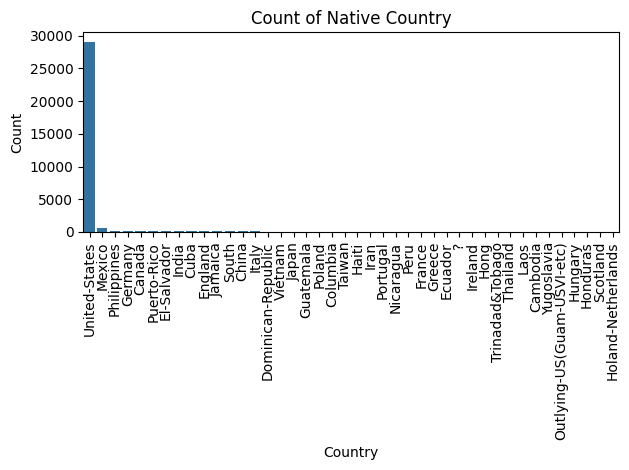

In [19]:
sns.countplot(data=data, x="native.country", order=data["native.country"].value_counts().index)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)
plt.title("Count of Native Country")
plt.xlabel("Country")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

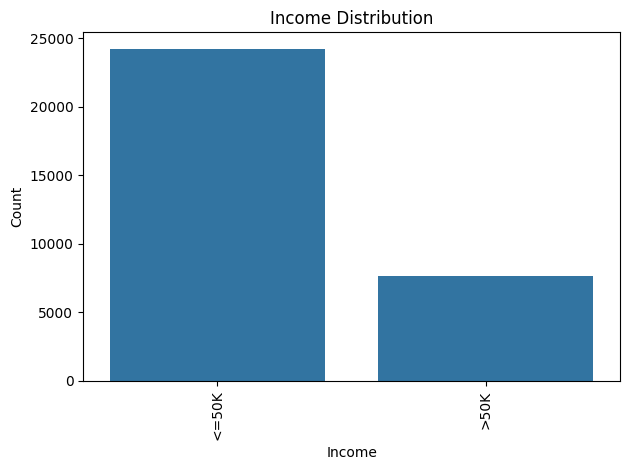

In [20]:
sns.countplot(data=data, x="income", order=data["income"].value_counts().index)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [21]:
# Replace "?" with NaN 
cols_to_replace = ["workclass", "occupation", "native.country"]
data[cols_to_replace] = data[cols_to_replace].replace("?", np.nan)

In [22]:
data.isna().sum()

age                  0
workclass         1772
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1779
relationship         0
race                 0
sex                  0
native.country      25
income               0
dtype: int64

Initial conclusions about the data:
- There are no missing values in the data however there are 3 columns with "?" instead of a value, which we will consider as a missing value. So in reality we have 1772 missing values in `workclass`, 1779 missing values in `occupation` and 25 missing values in `native.country`. Also there are 65 duplicated records which were drop since we don't want duplicated records
- `age`: Age of the individual.
- `workclass`: The type of employment or workclass of the individual (e.g., Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, etc.).
- `fnlwgt`: Final weight. This is an estimation of the number of people each observation in the dataset represents in the population. It's used in statistical sampling.
- `education`: The highest level of education attained by the individual (e.g., Bachelors, HS-grad, 11th, Masters, etc.).
- `education.num`: The numerical representation of education, often corresponding to the years of education (e.g., 13 for Bachelors, 9 for HS-grad, etc.).
- `marital.status`: Marital status of the individual (e.g., Married-civ-spouse, Divorced, Never-married, Separated, etc.).
- `occupation`: The occupation of the individual (e.g., Tech-support, Craft-repair, Other-service, Sales, etc.).
- `relationship`: Relationship status of the individual (e.g., Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).
- `race`: Ethnicity or race of the individual (e.g., White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other).
- `sex`: Gender of the individual (e.g., Male, Female).
- `native.country`: Country of origin or native country of the individual (e.g., United-States, Cambodia, England, Puerto-Rico, etc.). However pretty much all are from the US so we will first try one hot encoding but if it doesn't perform that well we will instead of creating 38 new columns using one-hot-encoding we can put a 1 if the individual's are from the US and 0 if they are not
- `income`: The target variable to be predicted, indicating whether an individual's annual income exceeds $50K. This is a binary classification task, with values being either ">50K" or "<=50K." The target variable is unbalanced is unbalanced

Dealing with missing values:
- To deal with the missing values we assume that the people with missing occupation or workclass are either unemployed (specially because most of them with one missing have the other too) or maybe work in a workclass that wasn't defined pre questionaire in the census. Therefore we think it is important to keep them, and as we can not predict their values in any way, we will let them be as they are as they will fall under the same category after one hot encoding these categories
- For the missing values on the native.country they were probably people that didn't want to disclose their nationality and we will trat them in 2 ways either leaving them as missing to create a special collumn just with them.The other way is to put them in a non-USA column (as they are more likely to not want to divulge their nacionality to the USA census if they aren't from the USA, creating a column divided into USA or non-USA, instead of having all countries)

## Data Visualization

#### Categorical variables

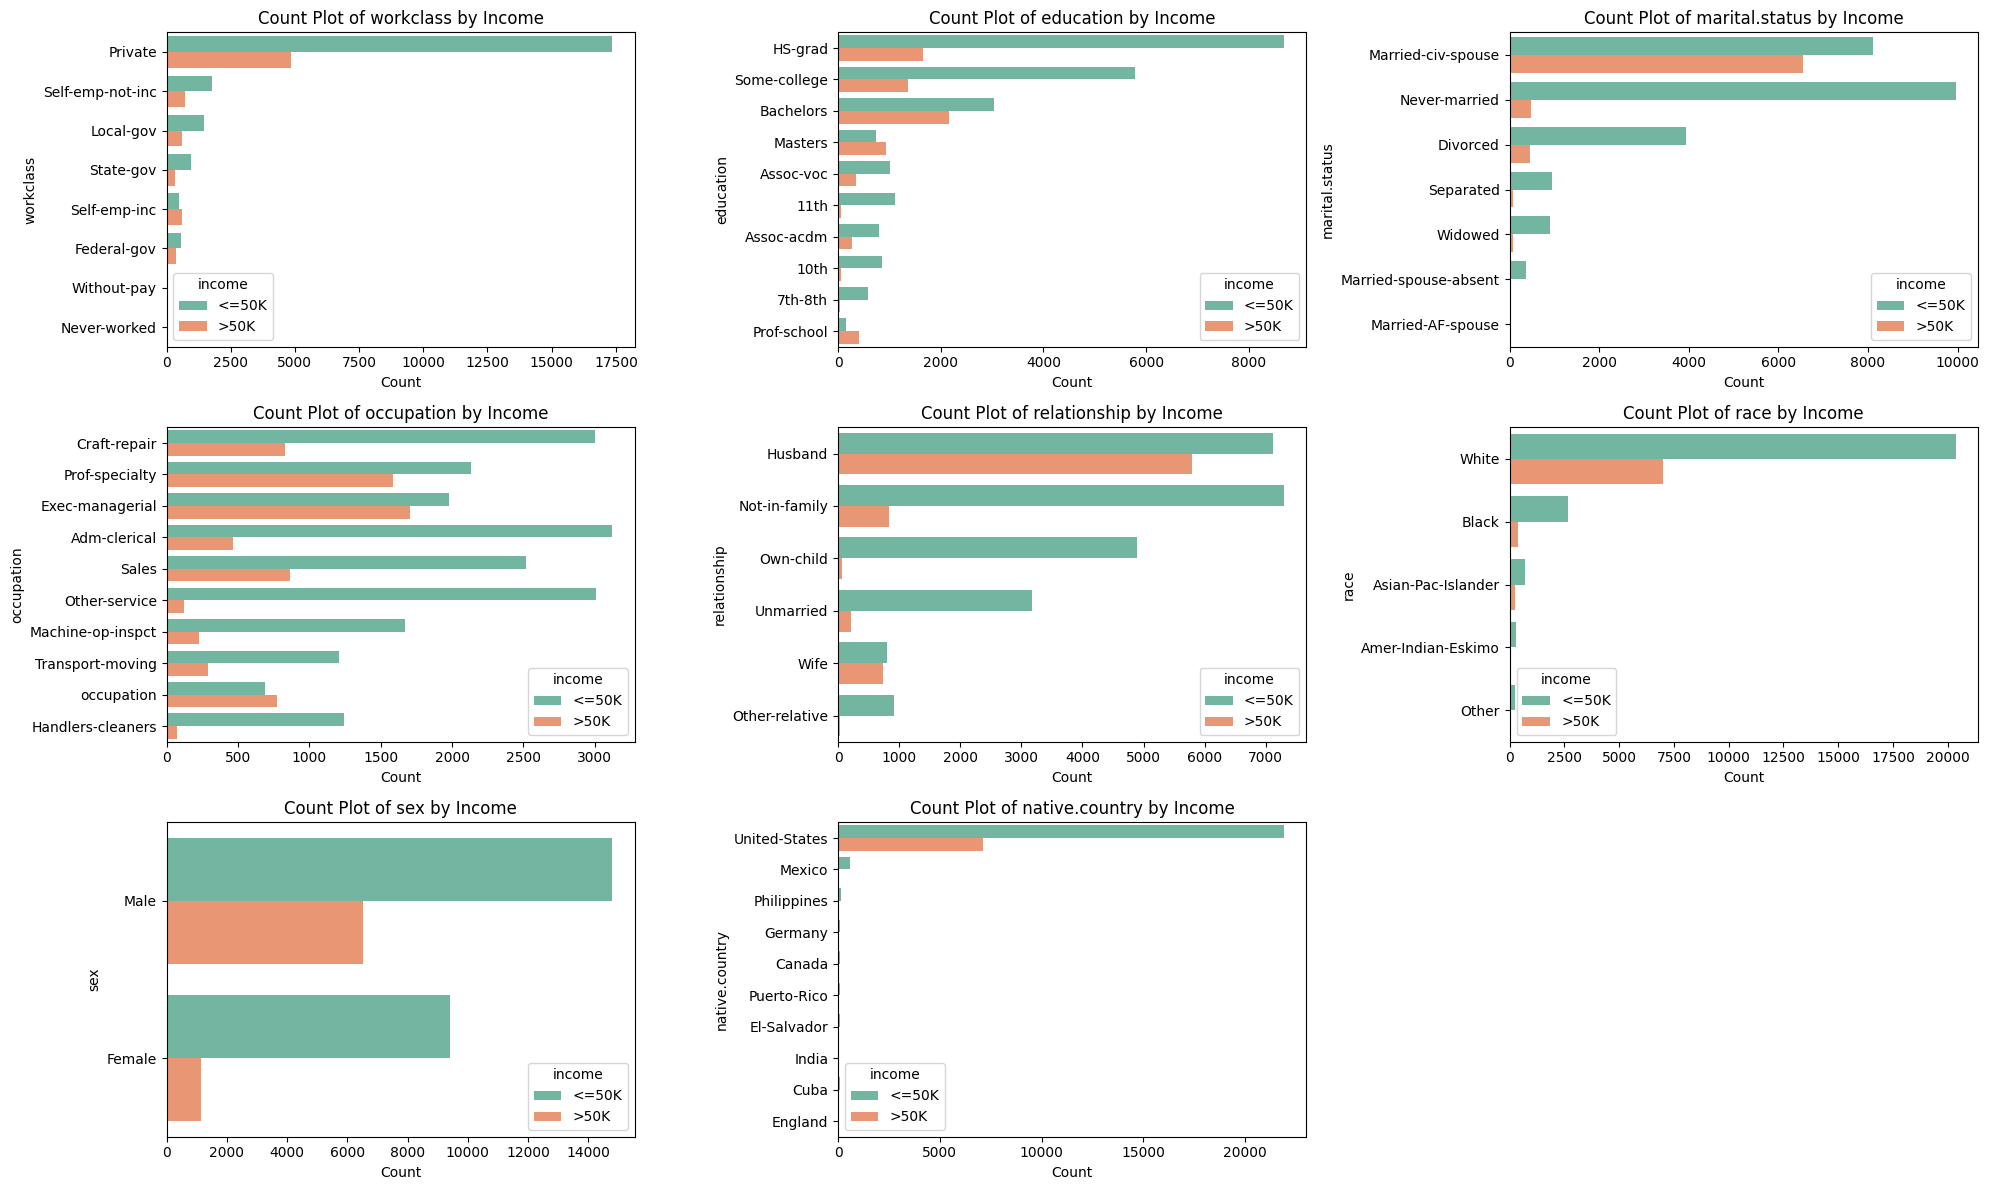

In [23]:
# Categorical columns 
cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex', 'native.country']

# Set up grid size based on number of plots
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Loop through each categorical column and create countplot with hue='income'
for i, col in enumerate(cat_cols):
    sns.countplot(data=data, y=col, order=data[col].value_counts().index[:10], 
                  hue='income', ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count Plot of {col} by Income')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Count")

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Numerical variables

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1038030402.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set2')
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1038030402.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set2')
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1038030402.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set2')


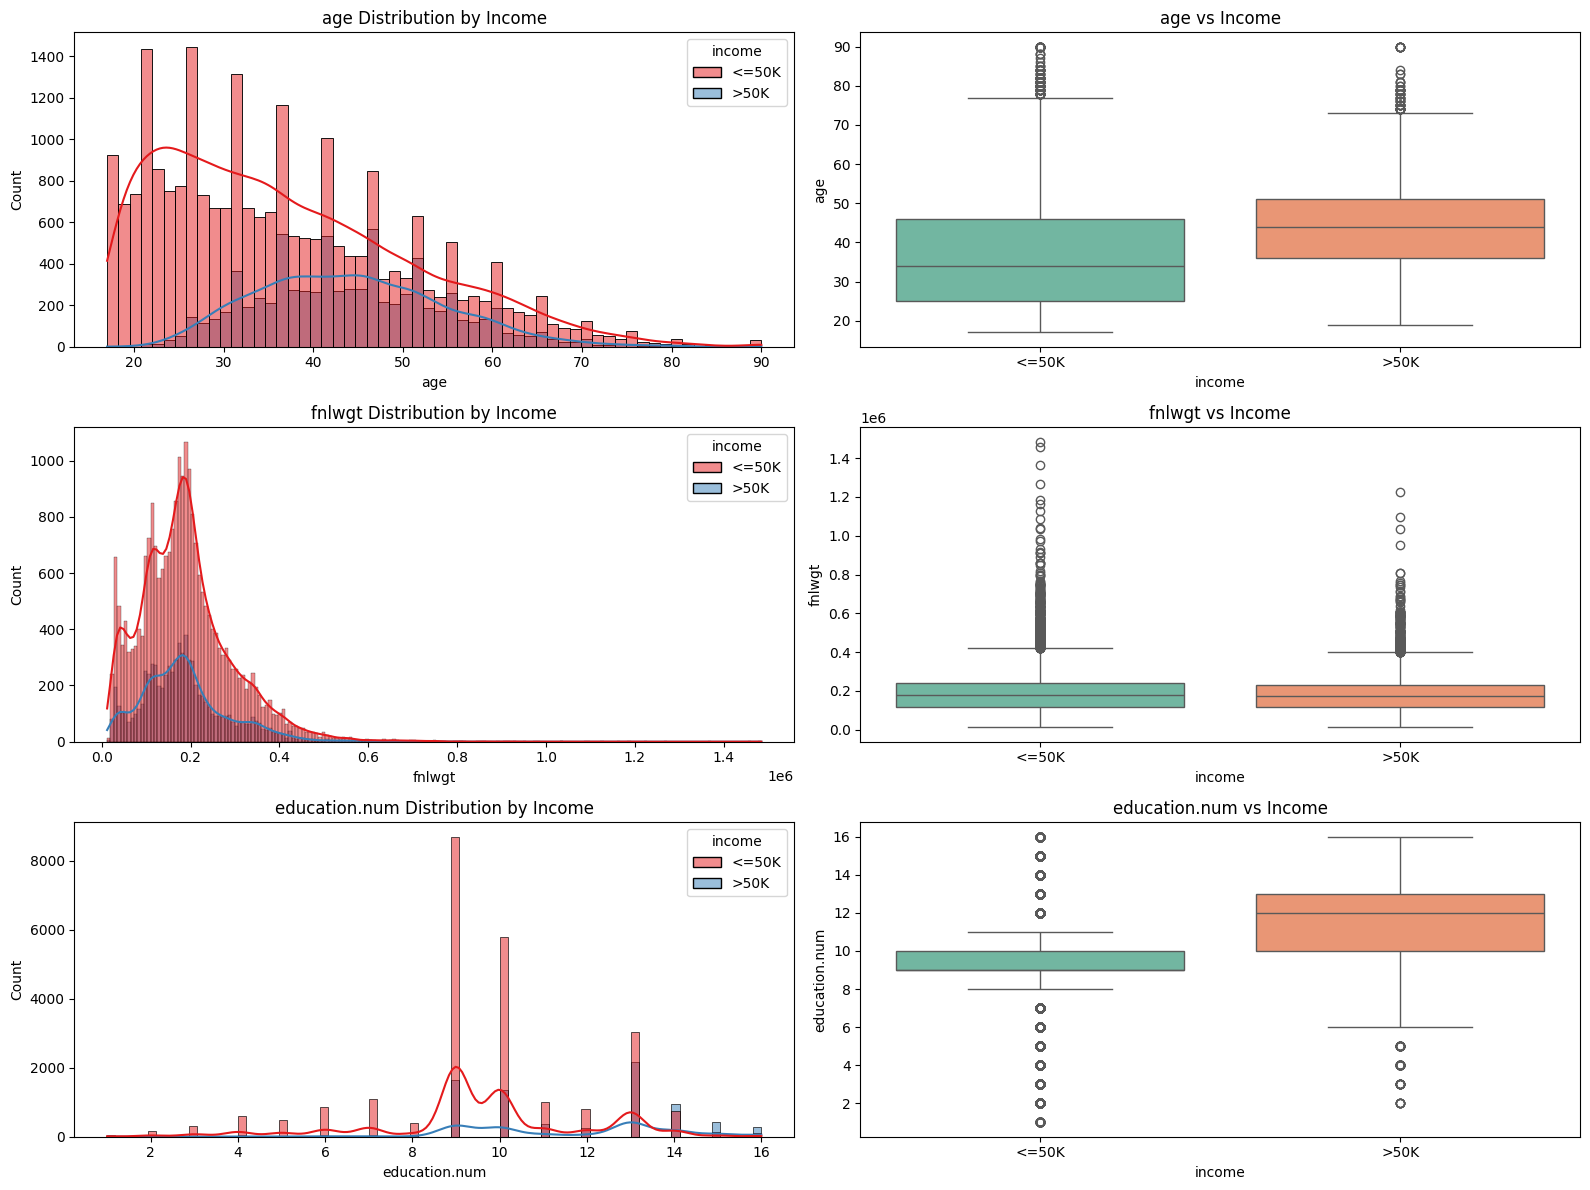

In [24]:
# Numerical columns
num_cols = ['age', 'fnlwgt', 'education.num']

# Set up subplot grid
n_cols = 2
n_rows = len(num_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.reshape(n_rows, n_cols)

# Loop through numerical columns
for i, col in enumerate(num_cols):
    # Histogram with KDE
    sns.histplot(data=data, x=col, kde=True, hue='income', ax=axes[i, 0], palette='Set1')
    axes[i, 0].set_title(f'{col} Distribution by Income')
    
    # Boxplot by income
    sns.boxplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set2')
    axes[i, 1].set_title(f'{col} vs Income')

plt.tight_layout()
plt.show()


### Outlier Analysis

#### Box plots and Violin plots

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1559617654.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set3', cut=0)
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1559617654.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set3', cut=0)
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1559617654.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set3',

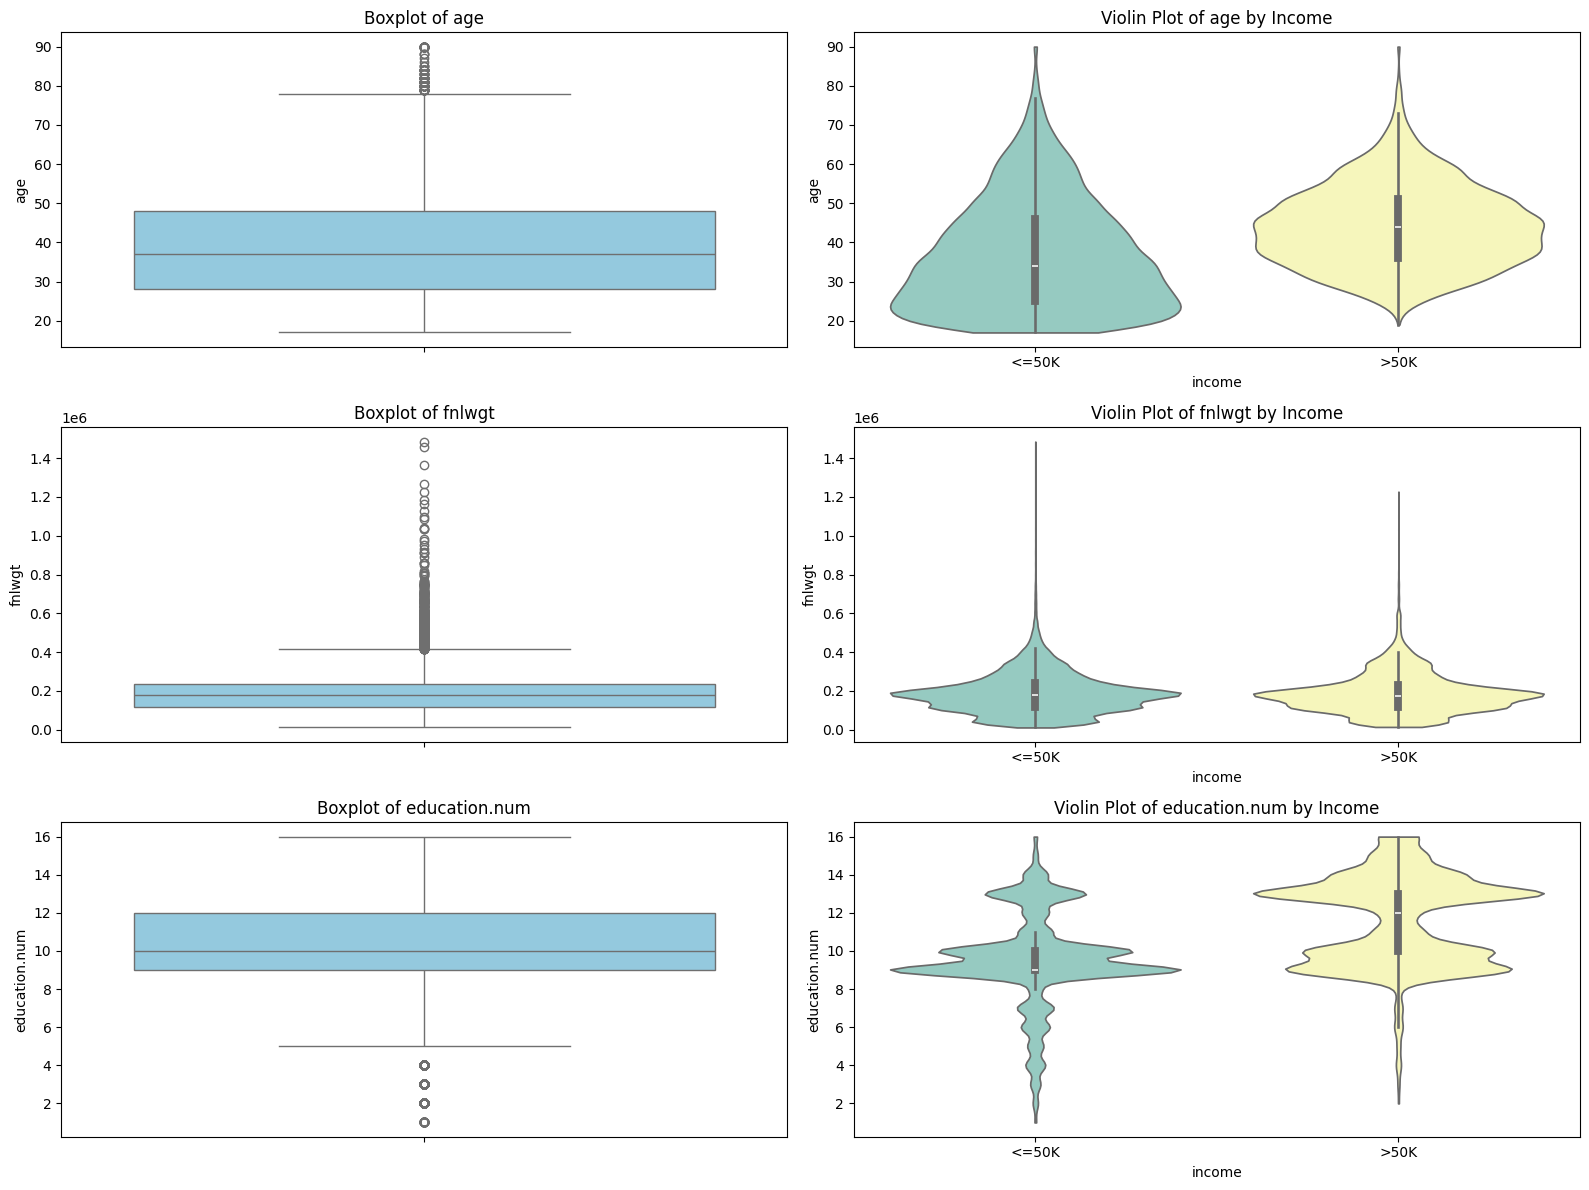

In [25]:
# Numerical columns to inspect
num_cols = ['age', 'fnlwgt', 'education.num']

# Setup plot grid
n_cols = 2
n_rows = len(num_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.reshape(n_rows, n_cols)

# Loop through numerical columns for outlier analysis
for i, col in enumerate(num_cols):
    # Standard boxplot
    sns.boxplot(data=data, y=col, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Boxplot of {col}')
    
    # Violin plot split by income
    sns.violinplot(data=data, x='income', y=col, ax=axes[i, 1], palette='Set3', cut=0)
    axes[i, 1].set_title(f'Violin Plot of {col} by Income')

plt.tight_layout()
plt.show()

#### Z-score

In [26]:
# Apply Z-score to numerical columns
z_scores = np.abs(zscore(data[['age', 'fnlwgt', 'education.num']]))
z_outliers = (z_scores > 3)

# Flag rows with any Z-score > 3
data['z_outlier'] = z_outliers.any(axis=1)
print(f"Z-score Outliers detected: {data['z_outlier'].sum()}")

Z-score Outliers detected: 653


In [27]:
# Apply Z-score to numerical columns
z_scores = np.abs(zscore(data[['age', 'education.num']]))
z_outliers = (z_scores > 3)

# Flag rows with any Z-score > 3
data['z_outlier_no_fnlwgt'] = z_outliers.any(axis=1)
print(f"Z-score Outliers detected: {data['z_outlier_no_fnlwgt'].sum()}")

Z-score Outliers detected: 323


#### Isolation Forest

In [28]:
# Fit Isolation Forest on numerical features
iso = IsolationForest(contamination=0.01, random_state=42)
data['iso_outlier'] = iso.fit_predict(data[['age', 'fnlwgt', 'education.num']])

# Convert predictions: -1 = outlier, 1 = inlier
data['iso_outlier'] = data['iso_outlier'] == -1
print(f"Isolation Forest Outliers detected: {data['iso_outlier'].sum()}")

Isolation Forest Outliers detected: 319


In [29]:
# Fit Isolation Forest on numerical features
iso = IsolationForest(contamination=0.01, random_state=42)
data['iso_outlier_no_fnlwgt'] = iso.fit_predict(data[['age', 'education.num']])

# Convert predictions: -1 = outlier, 1 = inlier
data['iso_outlier_no_fnlwgt'] = data['iso_outlier_no_fnlwgt'] == -1
print(f"Isolation Forest Outliers detected: {data['iso_outlier_no_fnlwgt'].sum()}")

Isolation Forest Outliers detected: 318


#### Plot Z-score and Isolation Forest

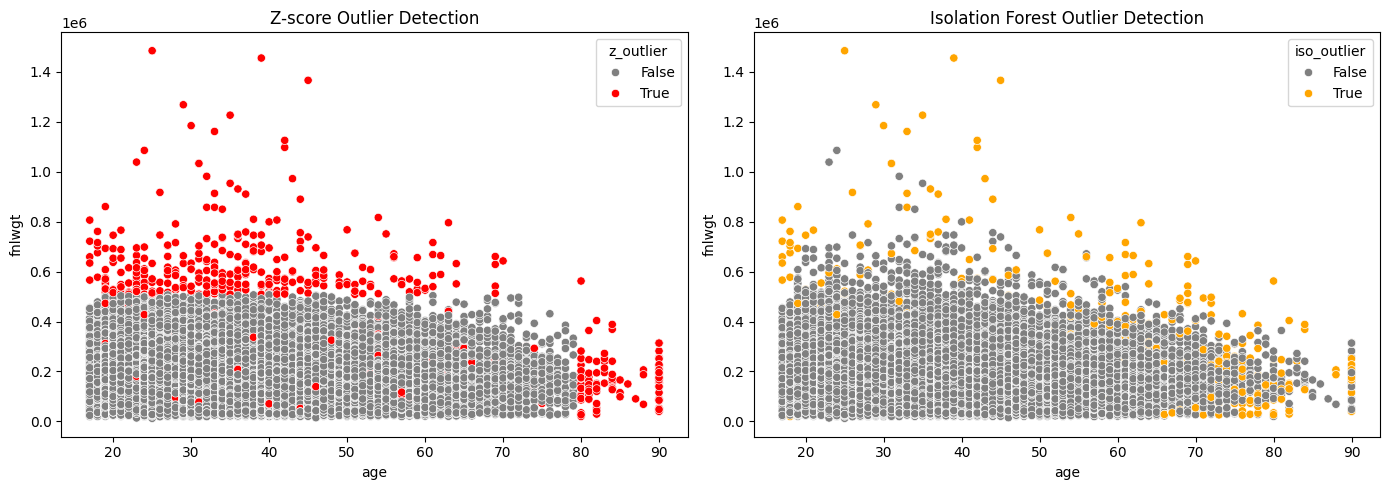

In [30]:
# Compare outliers on scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Z-score scatter
sns.scatterplot(data=data, x='age', y='fnlwgt', hue='z_outlier', palette={False: 'gray', True: 'red'}, ax=axes[0])
axes[0].set_title('Z-score Outlier Detection')

# Isolation Forest scatter
sns.scatterplot(data=data, x='age', y='fnlwgt', hue='iso_outlier', palette={False: 'gray', True: 'orange'}, ax=axes[1])
axes[1].set_title('Isolation Forest Outlier Detection')

plt.tight_layout()
plt.show()


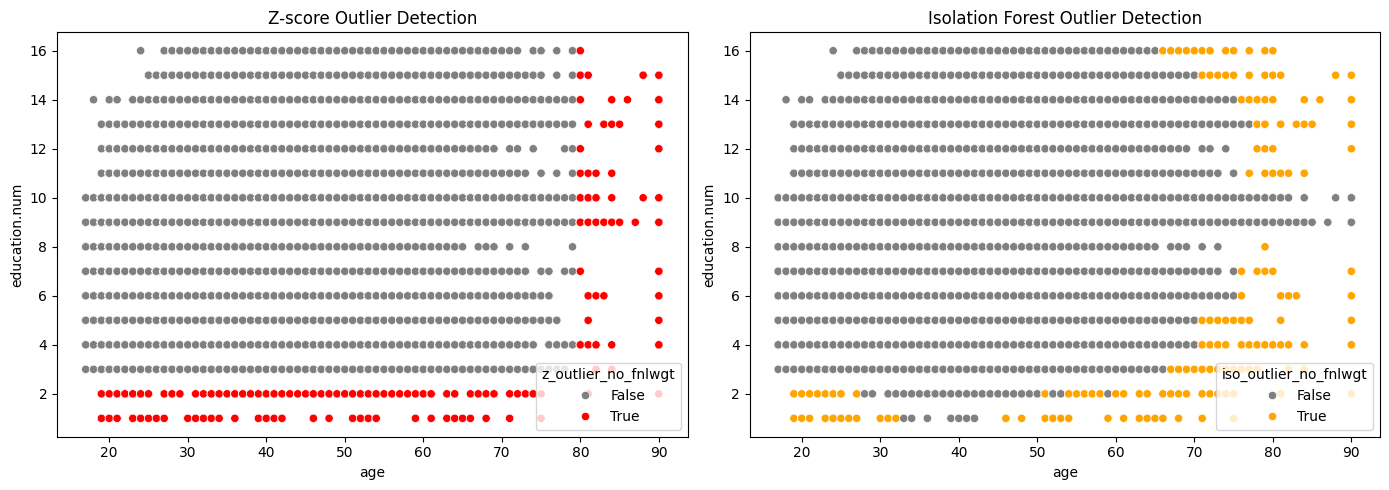

In [31]:
# Compare outliers on scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Z-score scatter
sns.scatterplot(data=data, x='age', y='education.num', hue='z_outlier_no_fnlwgt', palette={False: 'gray', True: 'red'}, ax=axes[0])
axes[0].set_title('Z-score Outlier Detection')

# Isolation Forest scatter
sns.scatterplot(data=data, x='age', y='education.num', hue='iso_outlier_no_fnlwgt', palette={False: 'gray', True: 'orange'}, ax=axes[1])
axes[1].set_title('Isolation Forest Outlier Detection')

plt.tight_layout()
plt.show()

Outliers conclusions:
- It can be seen some outliers in all the numerical variables. However the only variable where the outliers seem to be a problem is in the variable `fnlwgt`, the other outliers don't seem that much different than the rest of the data to actually be worth to deal with them
- In the multi-variable outliers both models show some outliers however this is highly inflated due to the column fnlwgt. When we do the analysis without this variable there are a lot less outliers and after plotting them, they don't seem that different than the other points of the data
- To deal with the outliers we will drop the `fnlwgt` variable as it has a lot of outliers and it isn't meaningful for what we are trying to predict

#### Dropping not relevant columns    

In [32]:
data.drop(columns=["fnlwgt", "education", "z_outlier", "z_outlier_no_fnlwgt", "iso_outlier", "iso_outlier_no_fnlwgt"], inplace=True)

- The column `fnlwgt` was explained before why it was dropped
- The column `education` was dropped because it is redundant as it gives use the same information as education.num and as education.num is already in a numerical format we prefer this one

# Train, Val, Test split

In [33]:
X = data.drop(columns=['income']) 
y = data['income']

# Train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 19129
Validation set size: 6376
Test set size: 6377


### Encoding the data

In [34]:
# Categorical and numerical columns
cat_cols = ['workclass', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex', 'native.country']
num_cols = ['age', 'education.num']

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

# Fit the preprocessor on training data
preprocessor.fit(X_train)

# Get new column names after transformation
num_features = num_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
other_features = [col for col in X_train.columns if col not in num_cols + cat_cols]
all_features = list(num_features) + list(cat_features) + list(other_features)

# Transform and wrap in DataFrames
X_train_encoded1 = pd.DataFrame(preprocessor.transform(X_train), columns=all_features)
X_val_encoded1 = pd.DataFrame(preprocessor.transform(X_val), columns=all_features)
X_test_encoded1 = pd.DataFrame(preprocessor.transform(X_test), columns=all_features)


In [35]:
print("Classes and their corresponding encodings:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx}: {label}")


Classes and their corresponding encodings:
0: <=50K
1: >50K


# Impute Missing Values

We wont do missing value imputation as the missing value are in variables that can be considered sensitive (`workclass`, `occupation` and `native.country`) and the missing values can be because the people actively chose not to put them maybe they are jobless, didn't want to tell the country due to being afraid of suffering prejudice or any other reason. Meaning that keeping the missing values on their own category can actually give us some important information

# Variable correlation

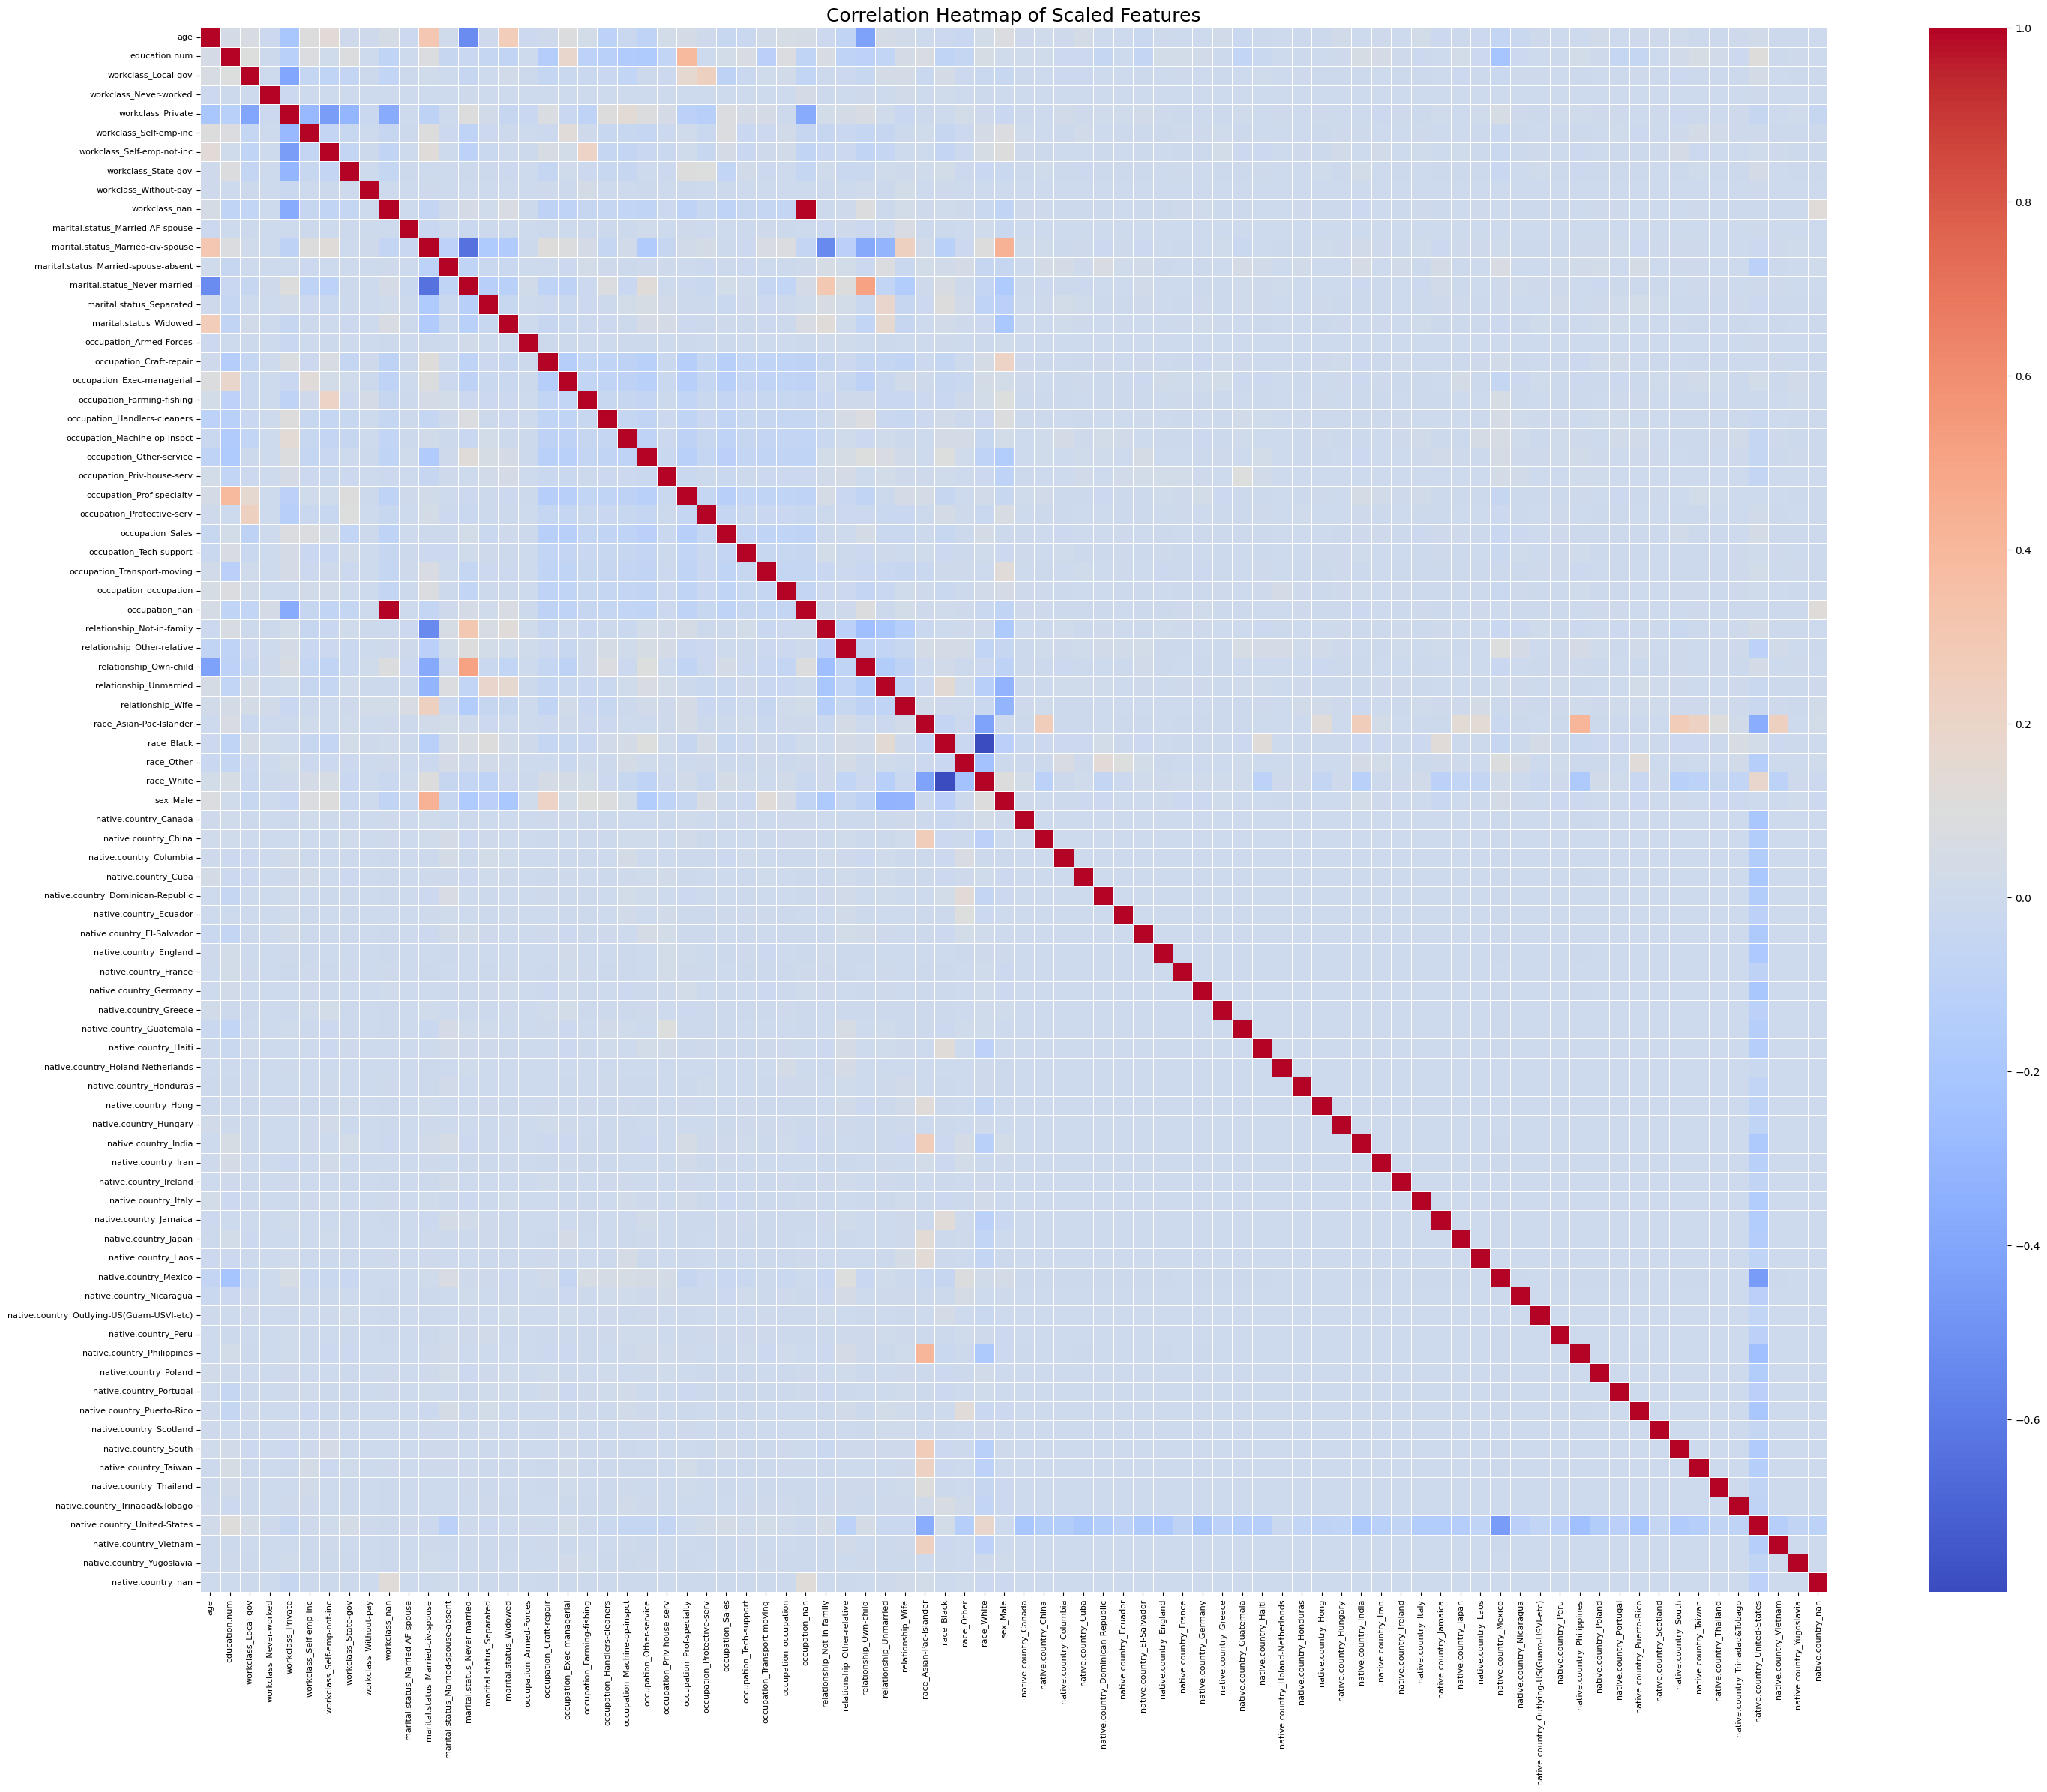

In [36]:
# Assuming X_train_encoded1 is already a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_encoded1)

# Compute the correlation matrix
correlation_matrix = X_train_scaled_df.corr()

# Plot the heatmap with larger figure size and rotated labels
plt.figure(figsize=(30, 24))  # Increased size to fit column names

sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True
)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.title('Correlation Heatmap of Scaled Features', fontsize=18)
plt.tight_layout()
plt.show()


The only possible highly correlated features are between the missing values in occupation and workclass none. As it was expected because as seen before most people with a missing value in the occupation also have it missing in the workclass. So we will drop the `workclass_nan` variable to avoid multicolinearity

In [37]:
X_train_encoded1.drop(columns = "workclass_nan", inplace= True)
X_val_encoded1.drop(columns = "workclass_nan", inplace= True)
X_test_encoded1.drop(columns = "workclass_nan", inplace= True)

X_train_encoded = X_train_encoded1.to_numpy()
X_val_encoded = X_val_encoded1.to_numpy()
X_test_encoded = X_test_encoded1.to_numpy()

# Modeling

Use x_train_encoded, x_val_encoded, x_test_encoded, y_train_encoded, y_val_encoded, y_test_encoded

We will use weighted f1 score as the metric used to evaluate models as our dataset is unbalanced and weighted F1 score is the best option. This because it balances precision and recall, accounting for class frequency. It calculates the F1 score of both classes and weights them by support (the real number of observations), giving a more meaningful overall score. It doesn't get inflated by the majority class making it more reliable when there is class dominance.

### Baseline model

In [38]:
# DummyClassifier with the strategy to predict the most frequent class
dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_model.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_dummy = dummy_model.predict(X_val_encoded)

print("Dummy Model Classification Report:")
print(classification_report(y_val_encoded, y_pred_dummy))

Dummy Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4842
           1       0.00      0.00      0.00      1534

    accuracy                           0.76      6376
   macro avg       0.38      0.50      0.43      6376
weighted avg       0.58      0.76      0.66      6376



c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Our baseline has weighted f1 score of 0.66. The weighted f1 score is the metric that will be used as our dataset is unbalanced and the weighted f1 score is the model that deals best with this unbalancedness

### Logistic Regression - basic model

In [39]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_encoded, y_train_encoded)

LogisticRegression(random_state=42)

In [40]:
y_pred_log_reg_train = log_reg.predict(X_train_encoded)

# Evaluate the model
print("Logistic Regression Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_log_reg_train))

Logistic Regression Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14525
           1       0.69      0.55      0.61      4604

    accuracy                           0.83     19129
   macro avg       0.78      0.74      0.75     19129
weighted avg       0.82      0.83      0.83     19129



In [41]:
y_pred_log_reg = log_reg.predict(X_val_encoded)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_val_encoded, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4842
           1       0.69      0.57      0.62      1534

    accuracy                           0.83      6376
   macro avg       0.78      0.74      0.76      6376
weighted avg       0.83      0.83      0.83      6376



Weighted f1 score: 0.83. Much better than our baseline. No overfit

### Decision Tree Classifier - basic model

In [42]:
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the model
tree_clf.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred_tree_train = tree_clf.predict(X_train_encoded)

# Evaluate the model
print("Decision Tree Classifier Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_tree_train))

Decision Tree Classifier Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14525
           1       0.93      0.84      0.88      4604

    accuracy                           0.95     19129
   macro avg       0.94      0.91      0.92     19129
weighted avg       0.95      0.95      0.95     19129



In [44]:
y_pred_tree = tree_clf.predict(X_val_encoded)

# Evaluate the model
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_val_encoded, y_pred_tree))

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4842
           1       0.56      0.55      0.55      1534

    accuracy                           0.79      6376
   macro avg       0.71      0.71      0.71      6376
weighted avg       0.79      0.79      0.79      6376



Weighted f1 score: 0.79. Much better than our baseline however worse than Logistic. Shows overfit, weighted f1 in train is 0.95

### Random Forest - basic model

In [45]:
rand_tree_clf = RandomForestClassifier(random_state=42)

# Train the model
rand_tree_clf.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rand_tree_train = rand_tree_clf.predict(X_train_encoded)

# Evaluate the model
print("Random Forest Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_rand_tree_train))

Random Forest Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14525
           1       0.90      0.88      0.89      4604

    accuracy                           0.95     19129
   macro avg       0.93      0.92      0.93     19129
weighted avg       0.95      0.95      0.95     19129



In [47]:
y_pred_rand_tree = rand_tree_clf.predict(X_val_encoded)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_val_encoded, y_pred_rand_tree))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4842
           1       0.61      0.56      0.59      1534

    accuracy                           0.81      6376
   macro avg       0.74      0.73      0.73      6376
weighted avg       0.80      0.81      0.81      6376



Weighted f1 score: 0.81. Much better than our baseline however worse than Logistic, however better than decision tree. It shows overfit weighted f1 in train in 0.95

### GradientBoostingClassifier - basic model

In [48]:
grad_boost = GradientBoostingClassifier(random_state=42)

# Train the model
grad_boost.fit(X_train_encoded, y_train_encoded)

GradientBoostingClassifier(random_state=42)

In [49]:
y_pred_boost_train = grad_boost.predict(X_train_encoded)

# Evaluate the model
print("Gradient Boosting Classifier Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_boost_train))

Gradient Boosting Classifier Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14525
           1       0.71      0.58      0.64      4604

    accuracy                           0.84     19129
   macro avg       0.79      0.75      0.77     19129
weighted avg       0.83      0.84      0.84     19129



In [50]:
y_pred_boost = grad_boost.predict(X_val_encoded)

# Evaluate the model
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_val_encoded, y_pred_boost))

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4842
           1       0.71      0.58      0.64      1534

    accuracy                           0.84      6376
   macro avg       0.79      0.75      0.77      6376
weighted avg       0.83      0.84      0.84      6376



Weighted f1 score: 0.84. Best results so far. No overfit

### SVC - basic model

In [51]:
svc = SVC(random_state=42)

# Train the model
svc.fit(X_train_encoded, y_train_encoded)

SVC(random_state=42)

In [52]:
y_pred_svc_train = svc.predict(X_train_encoded)

# Evaluate the model
print("SVC Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_svc_train))

SVC Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14525
           1       0.70      0.52      0.60      4604

    accuracy                           0.83     19129
   macro avg       0.78      0.73      0.75     19129
weighted avg       0.82      0.83      0.82     19129



In [53]:
y_pred_svc = svc.predict(X_val_encoded)

# Evaluate the model
print("SVC Classification Report:")
print(classification_report(y_val_encoded, y_pred_svc))

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4842
           1       0.70      0.54      0.61      1534

    accuracy                           0.83      6376
   macro avg       0.78      0.73      0.75      6376
weighted avg       0.83      0.83      0.83      6376



Weighted f1 score: 0.83. One of the best models, no overfit

### Naive Bayes Classifier (Bernoulli) - basic model

In [54]:
bernoullinb = BernoulliNB()

# Train the model
bernoullinb.fit(X_train_encoded, y_train_encoded)

BernoulliNB()

In [55]:
y_pred_bernoullinb_train = bernoullinb.predict(X_train_encoded)

# Evaluate the model
print("Naive Bayes (Bernoulli) Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_bernoullinb_train))

Naive Bayes (Bernoulli) Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     14525
           1       0.50      0.81      0.62      4604

    accuracy                           0.76     19129
   macro avg       0.71      0.78      0.72     19129
weighted avg       0.82      0.76      0.77     19129



In [56]:
y_pred_bernoullinb = bernoullinb.predict(X_val_encoded)

# Evaluate the model
print("Naive Bayes (Bernoulli) Classification Report:")
print(classification_report(y_val_encoded, y_pred_bernoullinb))

Naive Bayes (Bernoulli) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      4842
           1       0.48      0.80      0.60      1534

    accuracy                           0.75      6376
   macro avg       0.70      0.77      0.71      6376
weighted avg       0.82      0.75      0.76      6376



Weighted f1 score: 0.76. Not a very good result but no overfit

## Justification on why we chose these models:

1. Logistic Regression: it is simple, interpretable, and efficient. It effectively handles high-dimensional data and reduces the risk of overfitting through regularization. Additionally, its linear nature works well with one-hot encoding, making it a strong model in such cases.
2. Decision Tree Classifier: it can capture non-linear relationships and interactions between features. It doesn't require feature scaling or normalization and handles categorical data well. Additionally, it's interpretable, as the tree structure shows how decisions are made based on the features.
3. Random Forest: it combines multiple decision trees to improve accuracy and reduce overfitting. It handles high-dimensional data well, is robust to noise, and can capture complex relationships. Additionally, it provides feature importance, aiding in model interpretation.
4. Gradient Boosting Classifier: ability to iteratively improve model performance by focusing on errors made by previous trees. It reduces bias and variance, making it highly accurate for small datasets. The model builds trees sequentially, each correcting the shortcomings of the previous one, which helps capture complex patterns that simple models may miss. Additionally, it’s robust to overfitting, especially with techniques like early stopping and regularization. Its flexibility in handling various types of data (including one-hot encoded variables) and ability to rank feature importance make it an excellent choice for real-world classification tasks.
5. Support Vector Machine (SVM): it works well in high-dimensional spaces, which is common when using one-hot encoding. SVM is effective in finding the optimal hyperplane that maximizes the margin between classes, leading to better generalization. It’s particularly strong in cases where the data is not linearly separable, as it can use kernel functions to handle complex decision boundaries. Additionally, SVM is less prone to overfitting, especially with smaller datasets, when properly tuned with regularization parameters.
6. Bernoulli Naive Bayes (BernoulliNB): it assumes binary features (unlike other Naive Bayes Algorithms), making it naturally suited for the presence/absence information in one-hot encoding. It is simple, fast, and works well when the features are conditionally independent. Since it relies on probabilities, it can be very effective for datasets with fewer data points, where other complex models might overfit. Additionally, BernoulliNB performs well with categorical data and can provide solid performance with minimal computational overhead.

## First conclusion about the basic models

| Basic Models            | Train F1 Score | Validation F1 Score |
|------------------|----------------|---------------------|
| Baseline Model | 0.66          | 0.66               |
| Logistic Regression | 0.83           | 0.83                |
| Decision Tree      | 0.95           | 0.79                |
| Random Forest      | 0.95           | 0.81                |
| Gradient Booster   | 0.84           | 0.84                |
| SVM                | 0.82           | 0.83                |
| BernoulliNB        | 0.77          | 0.76                |


The model performing the best so far is the Gradient Booster, has the highest weighted f1 score and no overfit. We are going to choose 3 models to move forward and do gridsearches/randomsearches on them to try to get the best possible results. The models moving forward are: Random Forest, Gradient Booster and SVM

Why these models:
- Random Forest: Not a very bad performance, but it has some overfit. Shows potential for improvement
- Gradient Booster: Best overall so it makes sense to move to the stage
- SVM: Second best performer tied with Logistic Regression, shows no overfit and a lot of space for improvement as it scores higher on the validation than on the validation

Why not the others:
- Logistic Regression: Despite performing really well (second best performer) it doesn't have a lot of parameters to test so it doesn't have much space for improvement (however if the other models don't performed that much better than this one we will also do a hyperparameter tuner for this one)
- Decision Tree: not chosen as it is similar to Random Forest but shows worse results so choosing only 1 out of the 2 it had to be the Random Forest
- BernoulliNB: Massively under performs all the chosen models.

## Gridsearches/RandomSearches on the chosen models

### Random Forest - RandomSearch model

In [ ]:
# Parameter grid for Random Forest
param_dist = {
    'n_estimators': randint(20, 700),
    'max_depth': randint(3, 30), 
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 30),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)



# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=200, cv=5, verbose=2, 
    random_state=42, n_jobs=5, scoring='f1_weighted')

random_search.fit(X_train_encoded, y_train_encoded)

# Best hyperparameters and the corresponding score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best weighted F1 score: {random_search.best_score_}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best hyperparameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 26, 'n_estimators': 621}
Best F1 score: 0.8290586438819455


In [57]:
random_forest_optimized = RandomForestClassifier(random_state=42, bootstrap = True, class_weight = None, max_depth = 11, max_features = None, min_samples_leaf = 20, min_samples_split = 26, n_estimators = 621)

# Train the model
random_forest_optimized.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(max_depth=11, max_features=None, min_samples_leaf=20,
                       min_samples_split=26, n_estimators=621, random_state=42)

In [58]:
y_pred_rand_forest_optimized_train = random_forest_optimized.predict(X_train_encoded)

# Evaluate the model
print("Random Forest Optimized Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_rand_forest_optimized_train))

Random Forest Optimized Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14525
           1       0.71      0.59      0.65      4604

    accuracy                           0.84     19129
   macro avg       0.79      0.76      0.77     19129
weighted avg       0.84      0.84      0.84     19129



In [59]:
y_pred_rand_forest_optimized = random_forest_optimized.predict(X_val_encoded)

# Evaluate the model
print("Random Forest Optimized Classification Report:")
print(classification_report(y_val_encoded, y_pred_rand_forest_optimized))

Random Forest Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4842
           1       0.70      0.59      0.64      1534

    accuracy                           0.84      6376
   macro avg       0.79      0.75      0.77      6376
weighted avg       0.83      0.84      0.84      6376



Managed to increase our weighted f1 score from 0.81 to 0.84 in our validation data, while controling the overfit making it inexistent (weighted f1 score in train data went from 0.95 to 0.84 making it so that now there isn't overfit)

### Gradient Booster - RandomSearch model

In [ ]:
# Parameter distribution
param_dist = {
    'n_estimators': randint(50, 1000),     
    'learning_rate': uniform(0.001, 0.3),          
    'max_depth': randint(2, 20),                    
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'subsample': uniform(0.5, 0.5), # from 0.5 until 1
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],  
    'loss': ['log_loss', 'exponential']             
}

gb = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=300,                
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_weighted',
    error_score='raise'      
)

random_search.fit(X_train_encoded, y_train_encoded)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best weighted F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best hyperparameters: {'learning_rate': np.float64(0.089077553279348), 'loss': 'log_loss', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 574, 'subsample': np.float64(0.5407970902001202)}
Best F1 macro score: 0.8358


In [60]:
gradient_boost_optimized = GradientBoostingClassifier(random_state= 42, learning_rate = np.float64(0.089077553279348), loss = 'log_loss', max_depth = 4, max_features = 'log2', min_samples_leaf = 25, min_samples_split = 25, n_estimators = 574, subsample = np.float64(0.5407970902001202))

# Train the model
gradient_boost_optimized.fit(X_train_encoded, y_train_encoded)

GradientBoostingClassifier(learning_rate=np.float64(0.089077553279348),
                           max_depth=4, max_features='log2',
                           min_samples_leaf=25, min_samples_split=25,
                           n_estimators=574, random_state=42,
                           subsample=np.float64(0.5407970902001202))

In [61]:
y_pred_grad_boost_optimized_train = gradient_boost_optimized.predict(X_train_encoded)

# Evaluate the model
print("Gradient Boosting Optimized Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_grad_boost_optimized_train))

Gradient Boosting Optimized Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     14525
           1       0.72      0.59      0.65      4604

    accuracy                           0.85     19129
   macro avg       0.80      0.76      0.77     19129
weighted avg       0.84      0.85      0.84     19129



In [62]:
y_pred_grad_boost_optimized = gradient_boost_optimized.predict(X_val_encoded)

# Evaluate the model
print("Gradient Boosting Optimized Classification Report:")
print(classification_report(y_val_encoded, y_pred_grad_boost_optimized))

Gradient Boosting Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4842
           1       0.71      0.60      0.65      1534

    accuracy                           0.85      6376
   macro avg       0.80      0.76      0.78      6376
weighted avg       0.84      0.85      0.84      6376



The results of the model didn't change as both the weighted F1 score in the train and in the validation remained 0.84

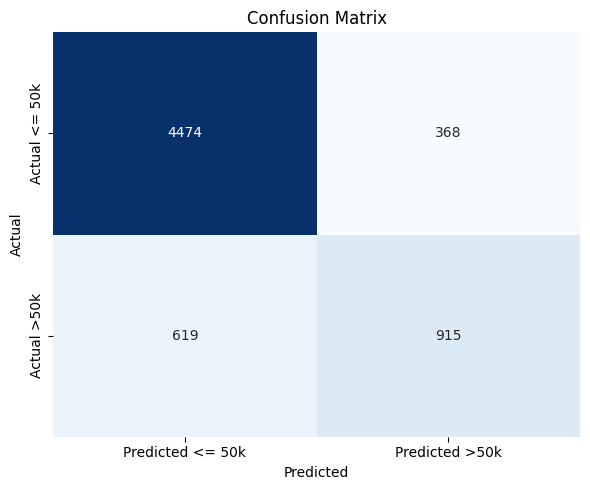

In [63]:
cm = confusion_matrix(y_val_encoded, y_pred_grad_boost_optimized)

# Labels for the number represented on the matrix
group_counts = [f"{value}" for value in cm.flatten()]

group_counts = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=group_counts, fmt='', cmap='Blues', cbar=False, 
            xticklabels=['Predicted <= 50k', 'Predicted >50k'], 
            yticklabels=['Actual <= 50k', 'Actual >50k'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [64]:
# Predicts
train_preds = gradient_boost_optimized.predict(X_train_encoded)
val_preds = gradient_boost_optimized.predict(X_val_encoded)

# Add predictions to the original data
X_train_with_preds = X_train.copy()
X_train_with_preds['model_prediction'] = train_preds

X_val_with_preds = X_val.copy()
X_val_with_preds['model_prediction'] = val_preds


In [65]:
X_val_with_preds

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,native.country,model_prediction
2101,20,State-gov,10,Never-married,Adm-clerical,Own-child,White,Male,United-States,0
3639,22,Private,11,Never-married,Other-service,Own-child,White,Female,United-States,0
20401,43,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
2639,21,Private,7,Never-married,Craft-repair,Not-in-family,White,Male,United-States,0
2070,20,Private,10,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,0
...,...,...,...,...,...,...,...,...,...,...
9837,30,Private,9,Never-married,Transport-moving,Not-in-family,White,Male,United-States,0
2160,20,NaN,9,Never-married,NaN,Other-relative,White,Male,El-Salvador,0
28247,56,Federal-gov,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,1
13448,34,State-gov,11,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0


### SVC - RandomSearch model

In [ ]:
param_dist = {
    'C': uniform(0.01, 1000),
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', *list(uniform(1e-5, 1e-2).rvs(10))],
    'degree': randint(2, 6),
    'coef0': uniform(0, 1),
    'shrinking': [True, False],
    'class_weight': [None, 'balanced'],
    'tol': uniform(1e-5, 1e-2),
    'max_iter': randint(-1, 20000),  # -1 = no limit
}

svc = SVC(random_state=42)
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=300,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_weighted',
    error_score='raise'
)

random_search.fit(X_train_encoded, y_train_encoded)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best F1 weighed score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best hyperparameters: {'C': np.float64(342.93686427826026), 'class_weight': None, 'coef0': np.float64(0.6791023191444896), 'degree': 4, 'gamma': np.float64(0.009626677257860343), 'kernel': 'rbf', 'max_iter': 6370, 'shrinking': True, 'tol': np.float64(0.007378224753949128)}
Best F1 weighed score: 0.8249


c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=6370).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [66]:
svc_optimized = SVC(random_state= 42, C = np.float64(342.93686427826026), class_weight = None, coef0 = np.float64(0.6791023191444896), degree = 4, gamma = np.float64(0.009626677257860343), kernel = 'rbf', max_iter = 6370, shrinking = True, tol = np.float64(0.007378224753949128))

# Train the model
svc_optimized.fit(X_train_encoded, y_train_encoded)

c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=6370).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=np.float64(342.93686427826026), coef0=np.float64(0.6791023191444896),
    degree=4, gamma=np.float64(0.009626677257860343), max_iter=6370,
    random_state=42, tol=np.float64(0.007378224753949128))

In [67]:
y_pred_svc_optimized_train = svc_optimized.predict(X_train_encoded)

# Evaluate the model
print("SVC Optimized Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_svc_optimized_train))

SVC Optimized Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14525
           1       0.68      0.54      0.60      4604

    accuracy                           0.83     19129
   macro avg       0.77      0.73      0.75     19129
weighted avg       0.82      0.83      0.82     19129



In [68]:
y_pred_svc_optimized = svc_optimized.predict(X_val_encoded)

# Evaluate the model
print("SVC Optimized Classification Report:")
print(classification_report(y_val_encoded, y_pred_svc_optimized))

SVC Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4842
           1       0.67      0.55      0.60      1534

    accuracy                           0.83      6376
   macro avg       0.77      0.73      0.75      6376
weighted avg       0.82      0.83      0.82      6376



There was only a slight improvement but not very significative, from 0.82 train and 0.83 validation to 0.83 train and 0.83 validation

As the results didn't improve that much even with the randomsearches we will also build one for the Logistic Regression to see if it produces better results

### Logistic Regression - RandomSearch model

In [200]:
# --- Valid combinations ---
valid_combos = [
    ('liblinear', 'l1'), ('liblinear', 'l2'),
    ('saga', 'l1'), ('saga', 'l2'), ('saga', 'elasticnet'), ('saga', None),
    ('lbfgs', 'l2'), ('lbfgs', None),
    ('newton-cg', 'l2'), ('newton-cg', None),
    ('sag', 'l2'), ('sag', None),
]

# --- Distributions ---
param_dist = {
    'C': uniform(0.01, 1000),
    'max_iter': randint(500, 5000),
    'tol': uniform(1e-5, 1e-2),
    'class_weight': [None, 'balanced'],
    'solver': list(set([s for s, _ in valid_combos])),
    'penalty': list(set([p for _, p in valid_combos])),
}

# --- Sample combinations ---
raw_samples = list(ParameterSampler(param_distributions=param_dist, n_iter=1000, random_state=42))

# --- Filter + insert l1_ratio ---
final_samples = []
for sample in raw_samples:
    if (sample['solver'], sample['penalty']) in valid_combos:
        if sample['penalty'] == 'elasticnet':
            sample['l1_ratio'] = float(uniform(0, 1).rvs())
        final_samples.append(sample)

# --- Manual loop over param sets ---
best_score = -np.inf
best_params = None

for params in final_samples:
    try:
        model = LogisticRegression(random_state=42, **params)
        scores = cross_val_score(model, X_train_encoded, y_train_encoded, cv=5, scoring='f1_weighted', n_jobs=-1)
        avg_score = np.mean(scores)

        if avg_score > best_score:
            best_score = avg_score
            best_params = params

    except Exception as e:
        print(f"Skipping config due to error: {e}\nParams: {params}\n")

# --- Results ---
print("Best F1 weighted score:", round(best_score, 4))
print("Best hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")


Best F1 weighted score: 0.826
Best hyperparameters:
  C: 976.5710233229042
  class_weight: None
  max_iter: 1674
  penalty: None
  solver: sag
  tol: 0.007828909129968897


In [69]:
log_regression_optimized = LogisticRegression(random_state=42, C = 976.5710233229042, class_weight = None, max_iter = 1674, penalty = None, solver = "sag",  tol = 0.007828909129968897)

# Train the model
log_regression_optimized.fit(X_train_encoded, y_train_encoded)

c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=976.5710233229042, max_iter=1674, penalty=None,
                   random_state=42, solver='sag', tol=0.007828909129968897)

In [70]:
y_pred_log_reg_optimized_train = log_regression_optimized.predict(X_train_encoded)

# Evaluate the model
print("Logistic Regression Optimized Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_log_reg_optimized_train))

Logistic Regression Optimized Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14525
           1       0.69      0.55      0.62      4604

    accuracy                           0.83     19129
   macro avg       0.78      0.74      0.75     19129
weighted avg       0.82      0.83      0.83     19129



In [71]:
y_pred_log_reg_optimized = log_regression_optimized.predict(X_val_encoded)

# Evaluate the model
print("Logistic Regression Optimized Classification Report:")
print(classification_report(y_val_encoded, y_pred_log_reg_optimized))

Logistic Regression Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4842
           1       0.68      0.57      0.62      1534

    accuracy                           0.83      6376
   macro avg       0.78      0.74      0.76      6376
weighted avg       0.82      0.83      0.83      6376



As expected the gridsearch (hand-made on this case) didn't produce much better result, in this case they stayed the same, 0.83 for the weighted F1 score on both train and validation data 

### Optimized Model Comparison – Weighted F1 Scores

| Optimized Model               | Train Score | Validation Score |
|--------------------|-------------|------------------|
| **Random Forest**       | **0.84**     | **0.84**          |
| **Gradient Boosting**   | **0.84**     | **0.84**          |
| SVC                 | 0.83        | 0.83             |
| Logistic Regression | 0.83        | 0.83             |


From the results we can see that Random Forest and Gradient Boosting are the two models that produce the best results, however not too far from the other two models, As all models pretty much yield values very similar we can see that 0.84 is probably the limit possible to achieve in this dataset. This because all the randomsearches and the hand-made griedsearch had a big search space and were not able to produce better results than these ones

### Model Comparison – Train and Validation F1 Scores (<=50k, >50k)

| Model               | Train (<=50k) | Train (>50k) | Validation (<=50k) | Validation (>50k) |
|---------------------|-----------|-----------|----------------|----------------|
| Random Forest       | 0.90      | 0.65      | 0.90           | 0.64           |
| **Gradient Boosting**   | **0.90**      | **0.65**      | **0.90**           | **0.65**          |


This second table allows us to see how similar the results obtained were between the two models. However Gradient Boosting produce a slightly better result. So we conclude that the optimized Gradient Boosting is the best model obtained

# Analysis of models results on validation data

In [72]:
train_analysis = pd.concat([X_train_with_preds, y_train], axis=1)
train_analysis['income'] = train_analysis['income'].apply(lambda x: 0 if x == '<=50K' else 1)
val_analysis = pd.concat([X_val_with_preds, y_val], axis=1)
val_analysis['income'] = val_analysis['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [73]:
val_analysis.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,native.country,model_prediction,income
2101,20,State-gov,10,Never-married,Adm-clerical,Own-child,White,Male,United-States,0,0
3639,22,Private,11,Never-married,Other-service,Own-child,White,Female,United-States,0,0
20401,43,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1,1
2639,21,Private,7,Never-married,Craft-repair,Not-in-family,White,Male,United-States,0,0
2070,20,Private,10,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,0,0


In [74]:
val_analysis['is_error'] = (val_analysis['model_prediction'] != val_analysis['income']).astype(int)

In [75]:
# Create bins for age and education
val_analysis['age_group'] = pd.cut(val_analysis['age'], bins=[0, 25, 40, 60, 100], labels=['<25', '25-40', '40-60', '60+'])
val_analysis['edu_level'] = pd.cut(val_analysis['education.num'], bins=[0, 8, 12, 16], labels=['Low', 'Medium', 'High'])

In [76]:
error_summary = (
    val_analysis
    .groupby(['sex', 'age_group', 'edu_level', 'occupation'])
    .agg(
        total_samples=('is_error', 'count'),
        errors=('is_error', 'sum')
    )
    .assign(error_rate=lambda df: df['errors'] / df['total_samples'])
    .query('total_samples >= 10')
    .sort_values('error_rate', ascending=False)
)


C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\4090002921.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['sex', 'age_group', 'edu_level', 'occupation'])


In [ ]:
colors = ['#FFC299', 'orange', 'red']
bounds = [0, 0.20, 0.35, 1]  # boundaries for the color change
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\168174702.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data.pivot_table(values='error_rate', index='occupation', columns='age_group'),


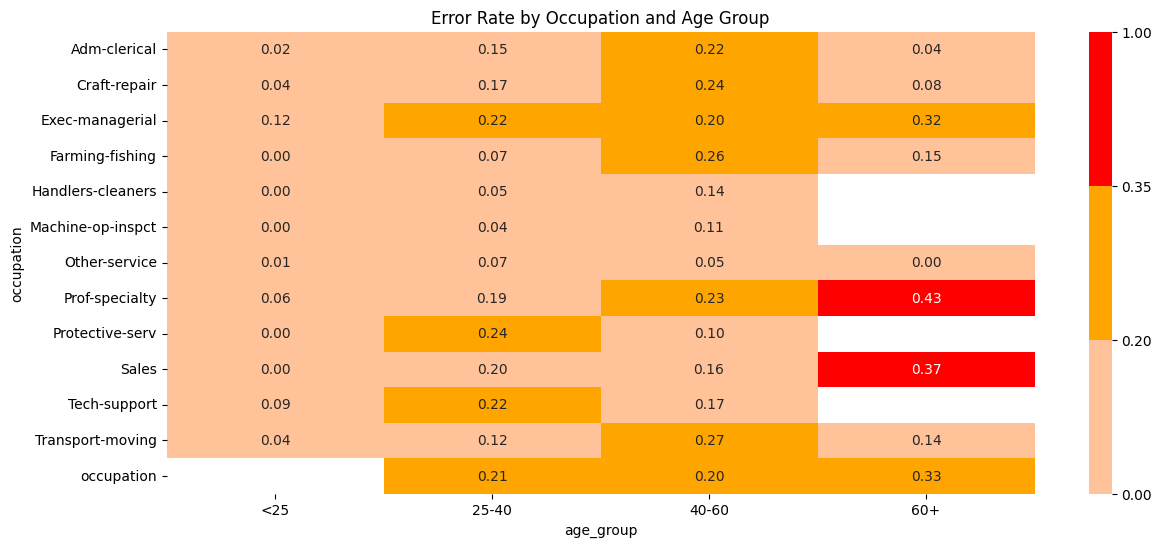

In [99]:
heat_data = error_summary.reset_index()

plt.figure(figsize=(14, 6))
sns.heatmap(
    heat_data.pivot_table(values='error_rate', index='occupation', columns='age_group'),
    annot=True, cmap=cmap, norm=norm, fmt=".2f"
)
plt.title('Error Rate by Occupation and Age Group')
plt.show()


From this plot we can see that the model doesn't appear to have problem predicting the income of young people, however in the other ages it faces more problems, especially in the range of 60+ years old. Also the occupations that seems to make the model struggle the most is Prof-specialty and Sales. In combination of the two variables (age and occupation), the group harder to predict is Prof.specialty with more than or equal to 60 years

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\3628830000.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sex_education = val_analysis.pivot_table(values= 'is_error', index='sex', columns='edu_level', aggfunc=np.mean)
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\3628830000.py:2: FutureWarning: The provided callable <function mean at 0x000001FB68C56D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_sex_education = val_analysis.pivot_table(values= 'is_error', index='sex', columns='edu_level', aggfunc=np.mean)


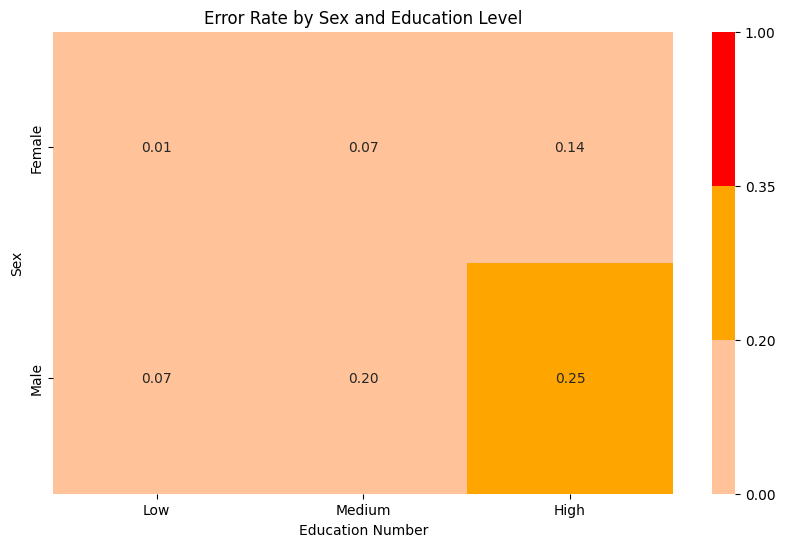

In [109]:
# Error rate of 'sex' and 'education.num'
pivot_sex_education = val_analysis.pivot_table(values= 'is_error', index='sex', columns='edu_level', aggfunc=np.mean)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sex_education, annot=True, cmap=cmap, norm=norm, fmt='.2f')
plt.title('Error Rate by Sex and Education Level')
plt.xlabel('Education Number')
plt.ylabel('Sex')
plt.show()


We can see that the model seems to struggle more to predict males with medium (still less than 20% error) and high education while with women it doesn't struggle that much, struggling more to predict people with high education

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\15659598.py:2: FutureWarning: The provided callable <function mean at 0x000001FB68C56D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_occupation_relationship = val_analysis.pivot_table(values='is_error', index='occupation', columns='relationship', aggfunc=np.mean)


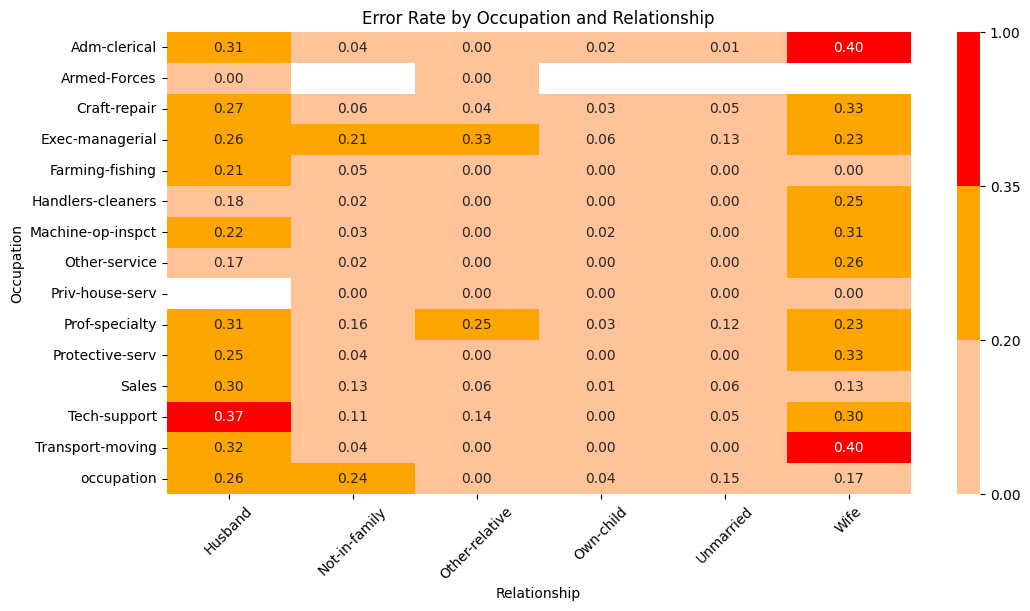

In [101]:
# Error rate of 'occupation' and 'relationship'
pivot_occupation_relationship = val_analysis.pivot_table(values='is_error', index='occupation', columns='relationship', aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_occupation_relationship, annot=True, cmap=cmap, norm=norm, fmt='.2f')
plt.title('Error Rate by Occupation and Relationship')
plt.xlabel('Relationship')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.show()

The models struggles more to predict the income of wifes, while also struggling to predict the husbands incomes, other categories of relationships are predicted relatively easily. The model really struggles to predict the income of wifes that work in adm-clerical and transport-moving

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\1232859834.py:2: FutureWarning: The provided callable <function mean at 0x000001FB68C56D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_country_race = val_analysis.pivot_table(values='is_error', index='sex', columns='race', aggfunc=np.mean)


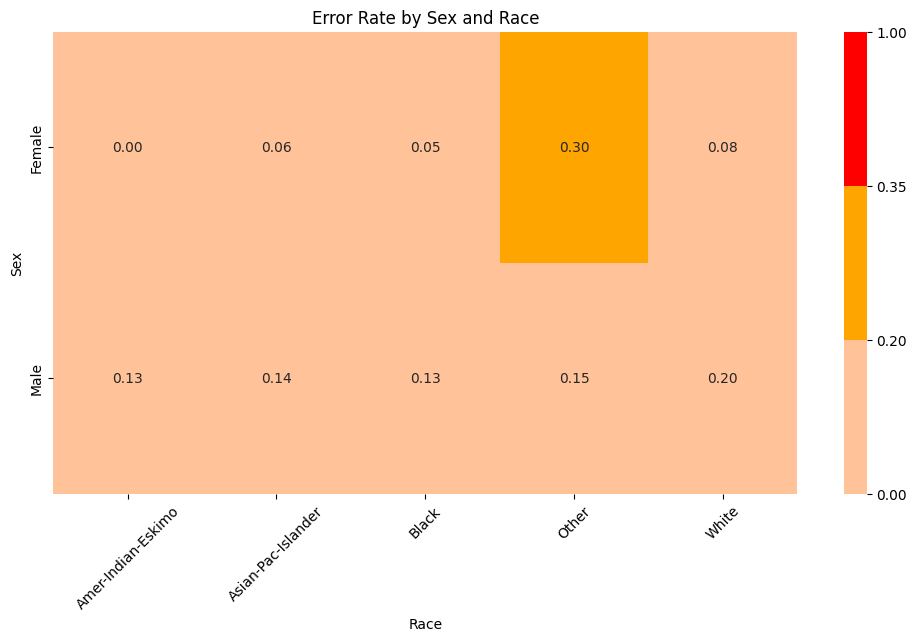

In [106]:
# Error rate of 'sex' and 'race'
pivot_country_race = val_analysis.pivot_table(values='is_error', index='sex', columns='race', aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_country_race, annot=True, cmap=cmap, norm=norm, fmt='.2f')
plt.title('Error Rate by Sex and Race')
plt.xlabel('Race')
plt.ylabel('Sex')
plt.xticks(rotation=45)
plt.show()

The model struggles the most to predict the income of women from other races, showing very little errors when predicting the other races and also men's income regardless of the race. 

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\3487244725.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_marital = val_analysis.pivot_table(values='is_error', index='age_group', columns='marital.status', aggfunc=np.mean)
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\3487244725.py:2: FutureWarning: The provided callable <function mean at 0x000001FB68C56D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_age_marital = val_analysis.pivot_table(values='is_error', index='age_group', columns='marital.status', aggfunc=np.mean)


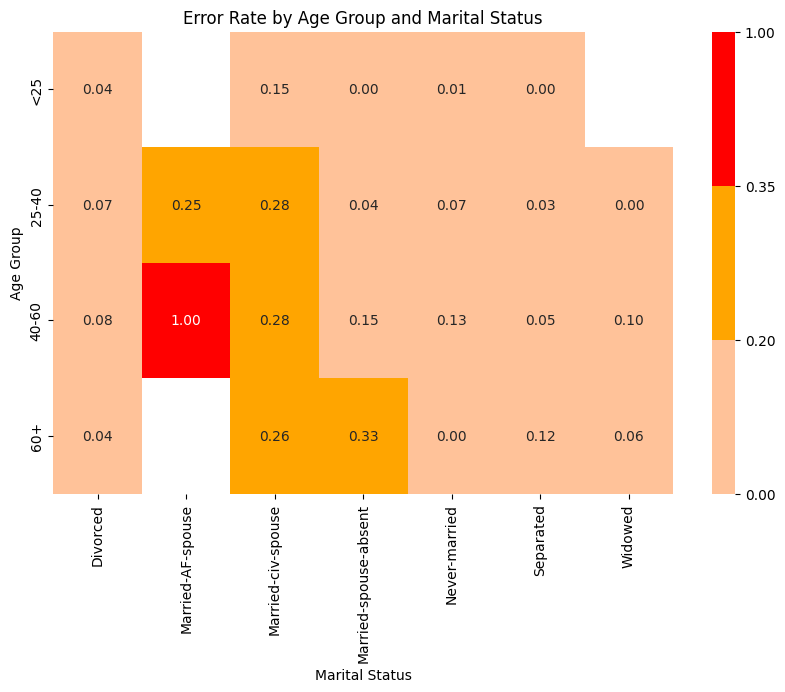

In [107]:
# Error rate of 'age_group' and 'marital.status'
pivot_age_marital = val_analysis.pivot_table(values='is_error', index='age_group', columns='marital.status', aggfunc=np.mean)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_age_marital, annot=True, cmap=cmap, norm=norm, fmt='.2f')
plt.title('Error Rate by Age Group and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age Group')
plt.show()

The model struggles to predict the income of married armed forces spouses the most having mistakes of 100% in these people between the ages of 40 to 60. Apart from this category the only one that shows some signs of struggling to predict is married civilian spouse, especially between the ages of 25 to 60, all other categories show some pretty good indicators

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\3211443851.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_education_workclass = val_analysis.pivot_table(values='is_error', index='workclass', columns='edu_level', aggfunc=np.mean)
C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\3211443851.py:2: FutureWarning: The provided callable <function mean at 0x000001FB68C56D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_education_workclass = val_analysis.pivot_table(values='is_error', index='workclass', columns='edu_level', aggfunc=np.mean)


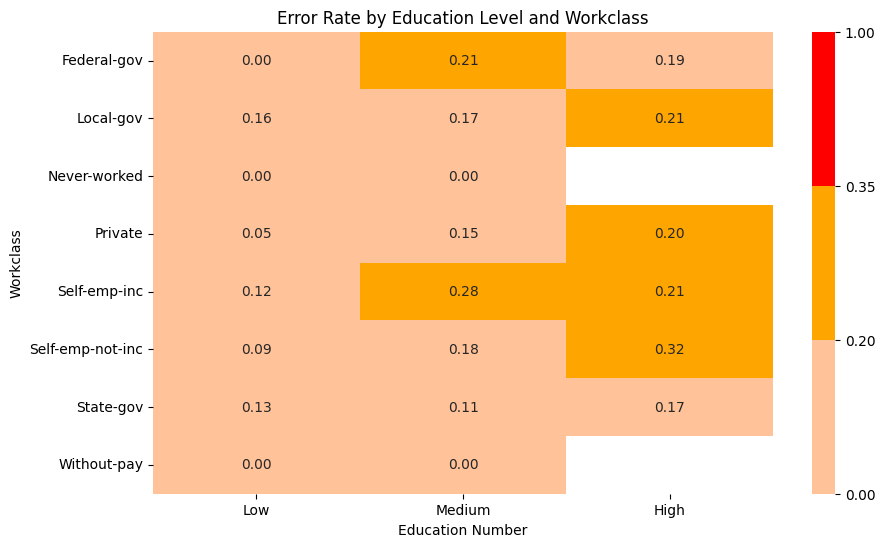

In [108]:
# Error rate of 'edu_level' and 'workclass'
pivot_education_workclass = val_analysis.pivot_table(values='is_error', index='workclass', columns='edu_level', aggfunc=np.mean)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_education_workclass, annot=True, cmap=cmap, norm=norm, fmt='.2f')
plt.title('Error Rate by Education Level and Workclass')
plt.xlabel('Education Number')
plt.ylabel('Workclass')
plt.show()

The model shows some pretty good indicator on this plot only showing difficulty to predict income when the people are self employed without income and have a high education level. Only in the medium education and self employed income also showing some struggle

Overall, on this analysis we can see that the model doesn't show a lot of signs of struggles with only 6 categories (the joint analysis of two variables) showing an error rate bigger than 35%. However overall the top 3 combinations that make the model commit more mistakes are (error rate in parenthesis):
- Married with Armed Forces spouse from 40 to 60 (100%)
- Prof-specialty as ocupation and more than 60 years old (43%)
- Wifes that either work as a adm-clerical or in transport-moving (40% each)

# Final predictions on the test data

In [110]:
y_pred_grad_boost_test_optimized = gradient_boost_optimized.predict(X_test_encoded)

# Evaluate the model
print("Gradient Boosting Optimized Classification Report:")
print(classification_report(y_test_encoded, y_pred_grad_boost_test_optimized))

Gradient Boosting Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4842
           1       0.70      0.59      0.64      1535

    accuracy                           0.84      6377
   macro avg       0.79      0.76      0.77      6377
weighted avg       0.83      0.84      0.84      6377



As expected the results aren't very different from the results on train and validation data as there were no overfit. So we can assume that the model is trustworthy and gives good results on never before seen data

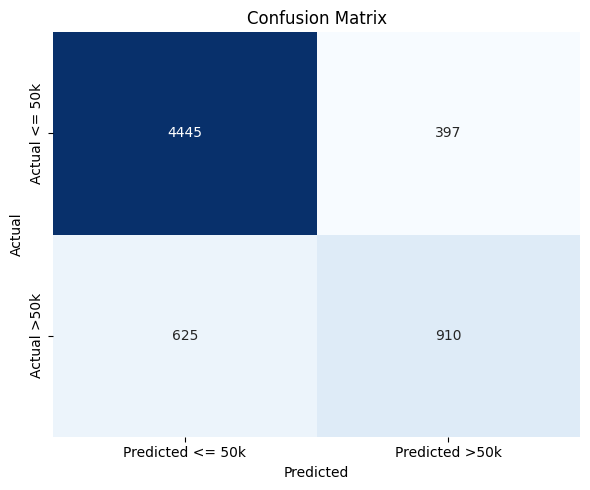

In [111]:
cm = confusion_matrix(y_test_encoded, y_pred_grad_boost_test_optimized)

# Labels for the number represented on the matrix
group_counts = [f"{value}" for value in cm.flatten()]

group_counts = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=group_counts, fmt='', cmap='Blues', cbar=False, 
            xticklabels=['Predicted <= 50k', 'Predicted >50k'], 
            yticklabels=['Actual <= 50k', 'Actual >50k'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


# Try 2: Different data preprocessing

In this try we will delete a lot of columns from the dataset after being one-hot-encoded by deleting all the nationalities and only keeping if the individuals are american or not. This will lead into a huge reduction on the number of variables and try to solve any problems due to the curse of dimensionality. The ultimate goal is to see if the models are able to perform better with this type of preprocessing

## Preprocessing 2

In [112]:
# Create 'from_US' based on the native.country
X_train['from_US'] = (X_train['native.country'] == 'United-States').astype(int)
X_val['from_US'] = (X_val['native.country'] == 'United-States').astype(int)
X_test['from_US'] = (X_test['native.country'] == 'United-States').astype(int)

# Drop the original 'native.country' column
X_train.drop(columns="native.country", inplace=True)
X_val.drop(columns="native.country", inplace=True)
X_test.drop(columns="native.country", inplace=True)


In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19129 entries, 26039 to 27736
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19129 non-null  int64 
 1   workclass       18055 non-null  object
 2   education.num   19129 non-null  int64 
 3   marital.status  19129 non-null  object
 4   occupation      18053 non-null  object
 5   relationship    19129 non-null  object
 6   race            19129 non-null  object
 7   sex             19129 non-null  object
 8   from_US         19129 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


In [114]:
X_val.head(3)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,from_US
2101,20,State-gov,10,Never-married,Adm-clerical,Own-child,White,Male,1
3639,22,Private,11,Never-married,Other-service,Own-child,White,Female,1
20401,43,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1


In [115]:
# Categorical columns to encode (excluding 'from_US')
cat_cols = ['workclass', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex']

# Numerical columns to normalize
num_cols = ['age', 'education.num', 'from_US']

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

# Fit the preprocessor on training data
preprocessor.fit(X_train)

# Get new column names after transformation
num_features = num_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
other_features = [col for col in X_train.columns if col not in num_cols + cat_cols]
all_features = list(num_features) + list(cat_features) + list(other_features)

# Transform and wrap in DataFrames
X_train_encoded2 = pd.DataFrame(preprocessor.transform(X_train), columns=all_features)
X_val_encoded2 = pd.DataFrame(preprocessor.transform(X_val), columns=all_features)
X_test_encoded2 = pd.DataFrame(preprocessor.transform(X_test), columns=all_features)


## Impute Missing Values

We wont do missing value imputation as the missing value are in variables that can be considered sensitive (`workclass`, `occupation` and `native.country`) and the missing values can be because the people actively chose not to put them maybe they are jobless, didn't want to tell the country due to being afraid of suffering prejudice or any other reason. Meaning that keeping the missing values on their own category can actually give us some important information. Missing values in the column `native.country` are treated as if they are from a country that is not US

## Correlation between variables

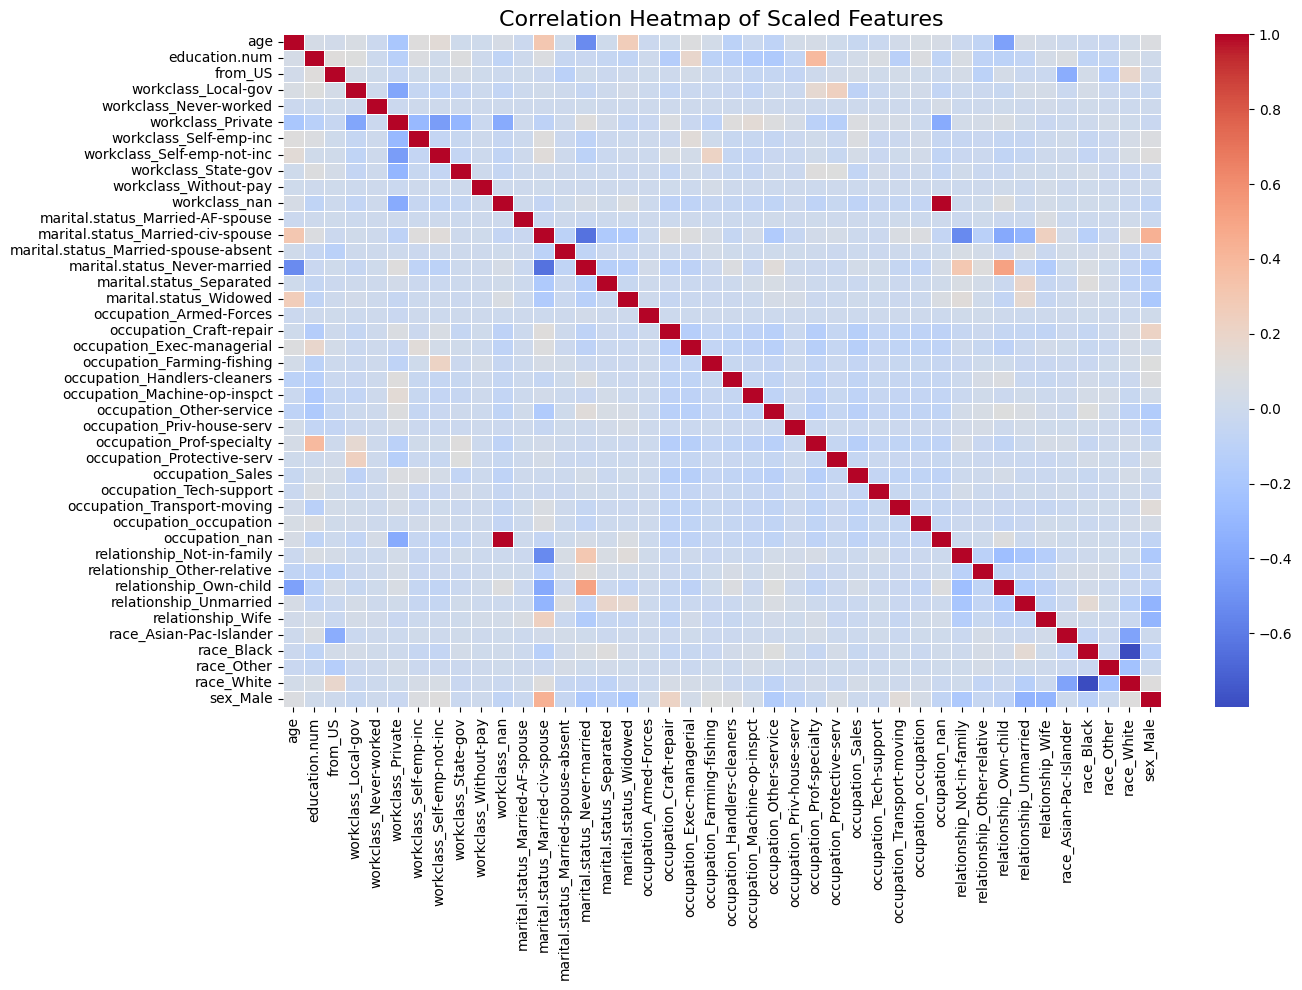

In [116]:
X_train_scaled_df = pd.DataFrame(X_train_encoded2)

correlation_matrix = X_train_scaled_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Scaled Features', fontsize=16)
plt.tight_layout()
plt.show()

Once again the same two variables are highly correlated so we will once again drop `workclass_nan`.

In [117]:
X_train_encoded2.drop(columns = "workclass_nan", inplace= True)
X_val_encoded2.drop(columns = "workclass_nan", inplace= True)
X_test_encoded2.drop(columns = "workclass_nan", inplace= True)

X_train_encoded3 = X_train_encoded2.to_numpy()
X_val_encoded3 = X_val_encoded2.to_numpy()
X_test_encoded3 = X_test_encoded2.to_numpy()

# Modeling

Use x_train_encoded, x_val_encoded, x_test_encoded, y_train_encoded, y_val_encoded, y_test_encoded

Once again we will use weighted f1 score as the metric used to evaluate models as our dataset is unbalanced and weighted F1 score is the best option. This because it balances precision and recall, accounting for class frequency. It calculates the F1 score of both classes and weights them by support (the real number of observations), giving a more meaningful overall score. It doesn't get inflated by the majority class making it more reliable when there is class dominance.

### Baseline Model

In [118]:
# DummyClassifier with the strategy to predict the most frequent class
dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_model.fit(X_train_encoded3, y_train_encoded)

# Make predictions
y_pred_dummy = dummy_model.predict(X_val_encoded3)

print("Dummy Model Classification Report:")
print(classification_report(y_val_encoded, y_pred_dummy))

Dummy Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4842
           1       0.00      0.00      0.00      1534

    accuracy                           0.76      6376
   macro avg       0.38      0.50      0.43      6376
weighted avg       0.58      0.76      0.66      6376



c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joaof\.conda\envs\data_mining_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

As expected the baseline is the same as the target variables are still the same and so is the split of train, validation and test

### Logistic Regression - Basic Model

In [119]:
log_reg2 = LogisticRegression(random_state=42)

log_reg2.fit(X_train_encoded3, y_train_encoded)

LogisticRegression(random_state=42)

In [120]:
y_pred_log_reg2_train = log_reg2.predict(X_train_encoded3)

# Evaluate the model
print("Logistic Regression 2 Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_log_reg2_train))

Logistic Regression 2 Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14525
           1       0.69      0.55      0.61      4604

    accuracy                           0.83     19129
   macro avg       0.78      0.74      0.75     19129
weighted avg       0.82      0.83      0.83     19129



In [121]:
y_pred_log_reg = log_reg2.predict(X_val_encoded3)

# Evaluate the model
print("Logistic Regression 2 Classification Report:")
print(classification_report(y_val_encoded, y_pred_log_reg))

Logistic Regression 2 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4842
           1       0.69      0.57      0.62      1534

    accuracy                           0.83      6376
   macro avg       0.78      0.74      0.76      6376
weighted avg       0.83      0.83      0.83      6376



### Decision Tree - Basic Model

In [122]:
tree_clf2 = DecisionTreeClassifier(random_state=42)

# Train the model
tree_clf2.fit(X_train_encoded3, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [123]:
y_pred_tree_train2 = tree_clf2.predict(X_train_encoded3)

# Evaluate the model
print("Decision Tree Classifier 2 Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_tree_train2))

Decision Tree Classifier 2 Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14525
           1       0.93      0.84      0.88      4604

    accuracy                           0.95     19129
   macro avg       0.94      0.91      0.92     19129
weighted avg       0.95      0.95      0.95     19129



In [124]:
y_pred_tree2 = tree_clf2.predict(X_val_encoded3)

# Evaluate the model
print("Decision Tree Classifier 2 Classification Report:")
print(classification_report(y_val_encoded, y_pred_tree2))

Decision Tree Classifier 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4842
           1       0.57      0.54      0.56      1534

    accuracy                           0.79      6376
   macro avg       0.71      0.71      0.71      6376
weighted avg       0.79      0.79      0.79      6376



### Random Forest - Basic Model

In [125]:
rand_tree_clf2 = RandomForestClassifier(random_state=42)

# Train the model
rand_tree_clf2.fit(X_train_encoded3, y_train_encoded)

RandomForestClassifier(random_state=42)

In [126]:
y_pred_rand_tree_train2 = rand_tree_clf2.predict(X_train_encoded3)

# Evaluate the model
print("Random Forest Train 2 Classification Report:")
print(classification_report(y_train_encoded, y_pred_rand_tree_train2))

Random Forest Train 2 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14525
           1       0.90      0.88      0.89      4604

    accuracy                           0.95     19129
   macro avg       0.93      0.92      0.93     19129
weighted avg       0.95      0.95      0.95     19129



In [127]:
y_pred_rand_tree2 = rand_tree_clf2.predict(X_val_encoded3)

# Evaluate the model
print("Random Forest 2 Classification Report:")
print(classification_report(y_val_encoded, y_pred_rand_tree2))

Random Forest 2 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4842
           1       0.61      0.56      0.59      1534

    accuracy                           0.81      6376
   macro avg       0.74      0.73      0.73      6376
weighted avg       0.80      0.81      0.81      6376



### Gradient Boosting - Basic Model

In [128]:
grad_boost2 = GradientBoostingClassifier(random_state=42)

# Train the model
grad_boost2.fit(X_train_encoded3, y_train_encoded)

GradientBoostingClassifier(random_state=42)

In [129]:
y_pred_boost_train2 = grad_boost2.predict(X_train_encoded3)

# Evaluate the model
print("Gradient Boosting Classifier 2 Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_boost_train2))

Gradient Boosting Classifier 2 Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14525
           1       0.71      0.57      0.64      4604

    accuracy                           0.84     19129
   macro avg       0.79      0.75      0.77     19129
weighted avg       0.83      0.84      0.84     19129



In [130]:
y_pred_boost2 = grad_boost2.predict(X_val_encoded3)

# Evaluate the model
print("Gradient Boosting Classifier Train Classification Report:")
print(classification_report(y_val_encoded, y_pred_boost2))

Gradient Boosting Classifier Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4842
           1       0.71      0.58      0.64      1534

    accuracy                           0.84      6376
   macro avg       0.79      0.75      0.77      6376
weighted avg       0.83      0.84      0.84      6376



### SVC - Basic Model

In [131]:
svc2 = SVC(random_state=42)

# Train the model
svc2.fit(X_train_encoded3, y_train_encoded)

SVC(random_state=42)

In [132]:
y_pred_svc_train2 = svc2.predict(X_train_encoded3)

# Evaluate the model
print("SVC 2 Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_svc_train2))

SVC 2 Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14525
           1       0.70      0.52      0.60      4604

    accuracy                           0.83     19129
   macro avg       0.78      0.72      0.74     19129
weighted avg       0.82      0.83      0.82     19129



In [133]:
y_pred_svc2 = svc2.predict(X_val_encoded3)

# Evaluate the model
print("SVC 2 Train Classification Report:")
print(classification_report(y_val_encoded, y_pred_svc2))

SVC 2 Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4842
           1       0.70      0.54      0.61      1534

    accuracy                           0.83      6376
   macro avg       0.78      0.73      0.75      6376
weighted avg       0.83      0.83      0.83      6376



### Bernoulli Naive Bayes - Basic Model

In [134]:
bernoullinb2 = BernoulliNB()

# Train the model
bernoullinb2.fit(X_train_encoded3, y_train_encoded)

BernoulliNB()

In [135]:
y_pred_bernoullinb_train2 = bernoullinb2.predict(X_train_encoded3)

# Evaluate the model
print("Naive Bayes (Bernoulli) 2 Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_bernoullinb_train2))

Naive Bayes (Bernoulli) 2 Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     14525
           1       0.49      0.81      0.61      4604

    accuracy                           0.75     19129
   macro avg       0.71      0.77      0.72     19129
weighted avg       0.82      0.75      0.77     19129



In [136]:
y_pred_bernoullinb2 = bernoullinb2.predict(X_val_encoded3)

# Evaluate the model
print("Naive Bayes (Bernoulli) 2 Classification Report:")
print(classification_report(y_val_encoded, y_pred_bernoullinb2))

Naive Bayes (Bernoulli) 2 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      4842
           1       0.48      0.80      0.60      1534

    accuracy                           0.75      6376
   macro avg       0.70      0.77      0.71      6376
weighted avg       0.82      0.75      0.76      6376



### Conclusions of the models

| Model            | Train F1 Score | Validation F1 Score |
|------------------|----------------|---------------------|
| Logistic Regression | 0.83           | 0.83                |
| Decision Tree      | 0.95           | 0.79                |
| Random Forest      | 0.95           | 0.81                |
| Gradient Booster   | 0.84           | 0.84                |
| SVM                | 0.82           | 0.83                |
| BernoulliNB        | 0.77          | 0.77                |

As can be seen the results obtained with half the variables remain pretty much the same as the ones obtained with more variables (only change is in BernoulliNB in the train weighted F1 score, where it was 0.78 and now is 0.77) so we can assume we didn't have the curse of dimensionality. Therefore as it seems there is no point on doing gridsearches/randomsearches on these models as the results are pretty much the same we can conclude that the previous defined optimized Gradient Boosting Classifier remains the best model. This said we will still do the griedsearch on the gradient booster just to prove this hypothesis

In [ ]:
# Parameter distribution
param_dist2 = {
    'n_estimators': randint(50, 1000),     
    'learning_rate': uniform(0.001, 0.3),          
    'max_depth': randint(2, 20),                    
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'subsample': uniform(0.5, 0.5), # from 0.5 until 1
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],  
    'loss': ['log_loss', 'exponential']             
}

gb2 = GradientBoostingClassifier(random_state=42)

random_search2 = RandomizedSearchCV(
    estimator=gb2,
    param_distributions=param_dist2,
    n_iter=300,                
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_weighted',
    error_score='raise'      
)

random_search2.fit(X_train_encoded3, y_train_encoded)

print(f"Best hyperparameters: {random_search2.best_params_}")
print(f"Best weighted F1 score: {random_search2.best_score_:.4f}")


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best hyperparameters: {'learning_rate': np.float64(0.23522847582053194), 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf': 11, 'min_samples_split': 32, 'n_estimators': 105, 'subsample': np.float64(0.6486775241184195)}
Best weighted F1 score: 0.8353


In [138]:
gradient_boost_optimized2 = GradientBoostingClassifier(random_state= 42, learning_rate = np.float64(0.23522847582053194), loss = 'exponential', max_depth = 3, max_features = 0.7, min_samples_leaf = 11, min_samples_split = 32, n_estimators = 105, subsample = np.float64(0.6486775241184195))

# Train the model
gradient_boost_optimized2.fit(X_train_encoded3, y_train_encoded)

GradientBoostingClassifier(learning_rate=np.float64(0.23522847582053194),
                           loss='exponential', max_features=0.7,
                           min_samples_leaf=11, min_samples_split=32,
                           n_estimators=105, random_state=42,
                           subsample=np.float64(0.6486775241184195))

In [139]:
y_pred_grad_boost_optimized_train2 = gradient_boost_optimized2.predict(X_train_encoded3)

# Evaluate the model
print("Gradient Boosting Optimized Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_grad_boost_optimized_train2))

Gradient Boosting Optimized Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14525
           1       0.71      0.60      0.65      4604

    accuracy                           0.84     19129
   macro avg       0.79      0.76      0.77     19129
weighted avg       0.84      0.84      0.84     19129



In [140]:
y_pred_grad_boost_optimized2 = gradient_boost_optimized2.predict(X_train_encoded3)

# Evaluate the model
print("Gradient Boosting Optimized Train Classification Report:")
print(classification_report(y_train_encoded, y_pred_grad_boost_optimized2))

Gradient Boosting Optimized Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14525
           1       0.71      0.60      0.65      4604

    accuracy                           0.84     19129
   macro avg       0.79      0.76      0.77     19129
weighted avg       0.84      0.84      0.84     19129



As expected we got the same results as in the first approach and as such we will remain with that model

# Most important original variables to the results obtained

To get this information we will use the RandomForest model that yielded the best results

In [141]:
y_train_temp = y_train.apply(lambda x: 0 if x == '<=50K' else 1)
y_val_temp = y_val.apply(lambda x: 0 if x == '<=50K' else 1)
y_test_temp = y_test.apply(lambda x: 0 if x == '<=50K' else 1)

In [142]:
X_analysis = pd.concat([X_train_encoded1, X_val_encoded1, X_test_encoded1], axis=0).reset_index(drop=True)
y_analysis = pd.concat([y_train_temp, y_val_temp, y_test_temp], axis=0).reset_index(drop=True)

C:\Users\joaof\AppData\Local\Temp\ipykernel_45612\2867840976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette='viridis')


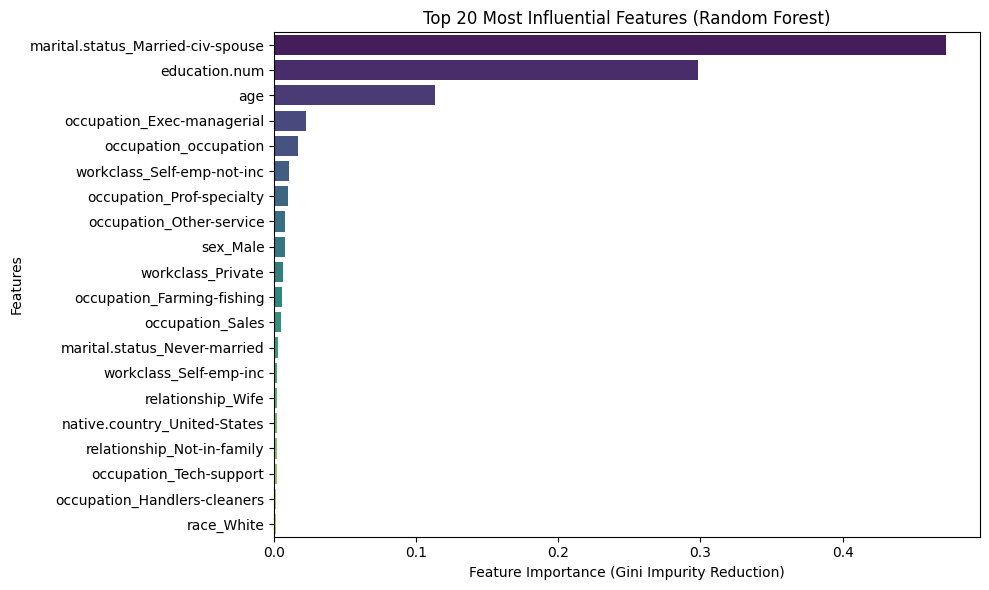

In [143]:
random_forest_og_variables = RandomForestClassifier(random_state=42, bootstrap = True, class_weight = None, max_depth = 11, max_features = None, min_samples_leaf = 20, min_samples_split = 26, n_estimators = 621)
random_forest_og_variables.fit(X_analysis, y_analysis)

importances = pd.Series(random_forest_og_variables.feature_importances_, index=X_analysis.columns)

top_20 = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.values, y=top_20.index, palette='viridis')
plt.title("Top 20 Most Influential Features (Random Forest)")
plt.xlabel("Feature Importance (Gini Impurity Reduction)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In this plot we can see that the most influential variable to reduce the Gini impurity on our results is `marital.status_Married-civ-spouse` meaning that is the category of people that are married to a civilian. There are also other two meaningful variables in terms of Gini impurity reduction, the `education.num` and `age` meaning the number of years studied and the age of a person. All other variables yield all similar and low values of Gini impurity reduction.

## Analysis on how these three variables correlate with our target

In [144]:
all = X_analysis.copy().drop(columns = [col for col in X_analysis if col != "marital.status_Married-civ-spouse" and col != "education.num" and col != "age"])
all['target'] = y_analysis

In [145]:
all

,age,education.num,marital.status_Married-civ-spouse,target
0,0.465753,0.533333,1.0,0
1,0.589041,0.866667,0.0,0
2,0.205479,0.533333,0.0,0
3,0.410959,0.866667,0.0,0
4,0.136986,0.800000,1.0,1
...,...,...,...,...
31877,0.027397,0.466667,1.0,1
31878,0.041096,0.600000,0.0,0
31879,0.424658,0.800000,1.0,1
31880,0.465753,0.533333,1.0,1


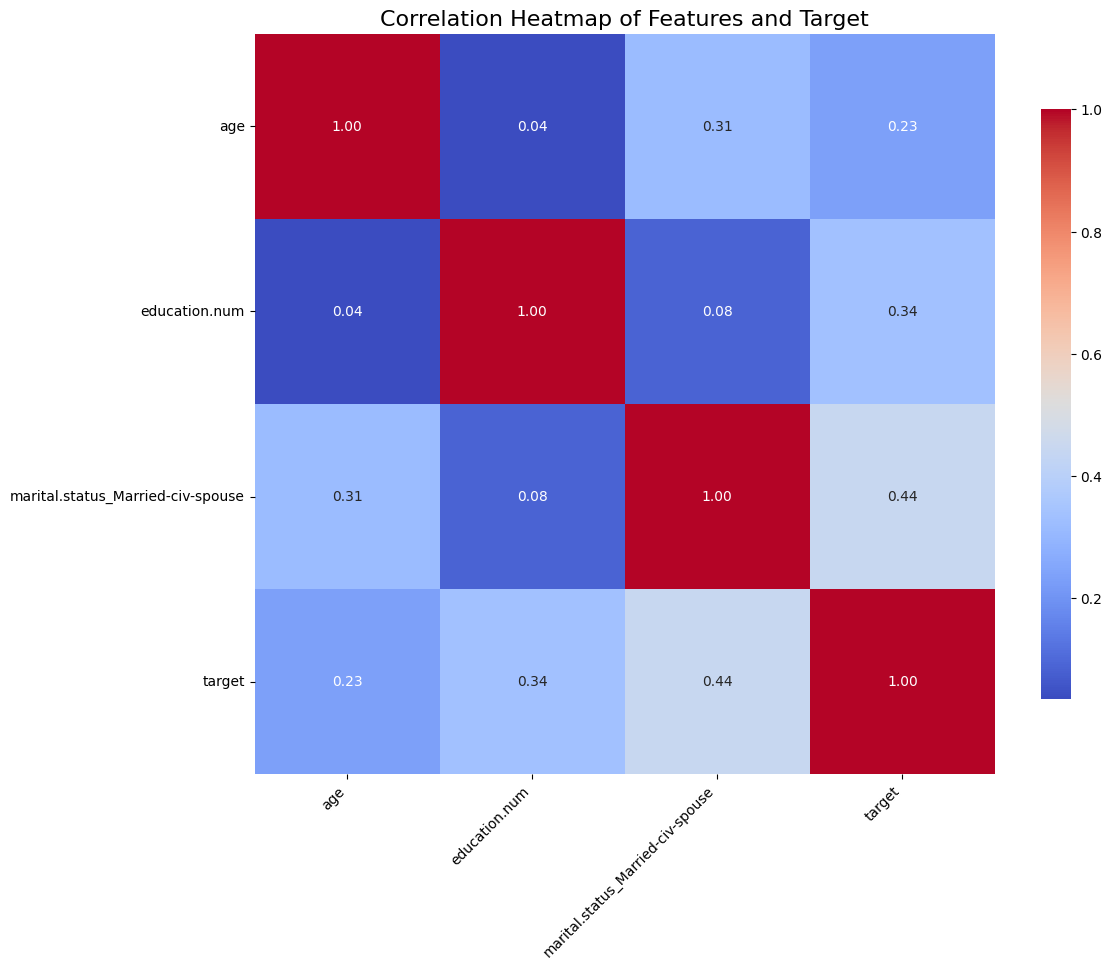

In [146]:
corr_matrix = all.corr(numeric_only=True)

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .75})

plt.title("Correlation Heatmap of Features and Target", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


We can see that all the three variables despite not being highly correlated with the target (highest correlation is between `marital.status_MArried-civ-spouse` and the target with correlation of 0.44), all of them are positively correlated with the target meaning that an increase on age, or years studied will increase the likelihood of someone earning more than 50k also if the person is married to a civilian it also increase the probability of that someone earning more than 50k